Entrega de caso de estudio: **Aprendizaje no supervisado**.

Integrantes:

**Alejandra Aguirre Monsalve**

**Daniel Alejandro Manco Vidales**

**Faber Esteban Arcila Galvis**

# **INFORMACIÓN GENERAL DE LA BASE DE DATOS (DF)**

**Información sobre el caso de estudio**.

Planteamiento del caso de estudio Aprendizaje no supervisado
Las técnicas de clasificación y agrupación de datos tienen una función importante para la identificación de características específicas de estos, a través del reconocimiento de patrones comunes entre tal información. Esto tiene vital importancia cuando se cuenta con datos desconocidos y se necesita un análisis de ellos para comprender su naturaleza para la toma de decisiones.
En la industria de producción de vinos es importante la determinación de las cantidades los componentes que contiene un vino, ya que permite:

- Garantizar la calidad del vino por parte del productor.

- Certificar la calidad del vino por parte de la asociación vitivinícola.

- Desarrollar datos del vino para aclarar las situaciones que han provocado anomalías en el sistema industrial.

- Iniciar una nueva idea de negocio del vino según las demandas de diferentes cultivares.

En este caso se presenta una base de datos **(wine)** la cual contiene información química sobre distintos vinos fabricados en tres cultivares distintos de una misma región de Italia.
Estos datos son el resultado de un análisis químico de vinos cultivados en la misma región de Italia pero derivados de tres cultivares diferentes.

El análisis determinó las cantidades de 13 componentes que se encuentran en cada uno de los tres tipos de vinos.

**Explicación de las variables**


- **Alcohol:**
Contenido de alcohol en el vino.

- **Malic Acid:**
El ácido málico es un ácido orgánico que se encuentra de forma natural en las uvas.
- **Ash:**
La ceniza se refiere a las sustancias inorgánicas que quedan después de quemar una muestra de vino.
- **Alcalinity of ash:**
Cantidad de alcalinidad en la ceniza.
- **Magnesium:**
Magnesio presente en el vino.
- **Total phenols:**
Los fenoles son compuestos químicos que se encuentran en las uvas y pueden aportar propiedades antioxidantes y color al vino.
- **Flavanoids:**
Los flavonoides son un subconjunto de fenoles que contribuyen a los colores y sabores del vino.
- **Nonflavanoids Phenols:**
Estos son otros tipos de fenoles que no son flavonoides.
- **Proanthocyanins:**
Las proantocianidinas son un tipo específico de flavonoides que pueden contribuir a la estructura y el sabor del vino.
- **Color intensity:**
Profundidad y riqueza del color del vino.
- **Hue:**
Tonalidad del color del vino.
- **OD280/OD315 of diluted wines**
Estos valores se refieren a la absorbancia de luz del vino.
- **Proline:**
La prolina es un aminoácido que se encuentra en el vino.



# **EDA**

In [ ]:
%pip install kneed

In [ ]:
#conectamos drive para leer las bases de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA, FactorAnalysis

In [ ]:
pd.set_option('display.max_columns', None) #muestra todas las columnas de tablas
%matplotlib inline

In [ ]:
wine = pd.read_csv('/content/drive/MyDrive/Entrega 2 Analitica/wine-clustering.csv') #Carga del DF con que se va a abordar el caso de estudio

In [ ]:
#Se convierten todas las columnas de las bases de datos a minúscula para estandarizar y disminuir errores en el código
wine.columns = wine.columns.str.lower()

In [ ]:
wine.head() # se hace una observación del DF wine

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
print(wine.shape) #Se consulta el tamaño del DF

(178, 13)


In [ ]:
wine.info() #Resumen informativo de la naturaleza de las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   ash_alcanity          178 non-null    float64
 4   magnesium             178 non-null    int64  
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280                 178 non-null    float64
 12  proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
wine.isnull().sum() #Se consulta la cantidad exacta de datos nulos en cada variable

alcohol                 0
malic_acid              0
ash                     0
ash_alcanity            0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64

In [ ]:
#Variables de interés
##Se consultan los datos del DF para hacer una exploración visual de manera muy general con el fin de observar
##algún tipo de error de digitación, puntuación o ingreso de los datos
x = ['alcohol', 'malic_acid', 'ash','ash_alcanity', 'magnesium','total_phenols', 'flavanoids','nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280', 'proline']
for i in x:
  print(wine[i].unique())
  print()

[14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]

[1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.7  1.97 1.43 0.94

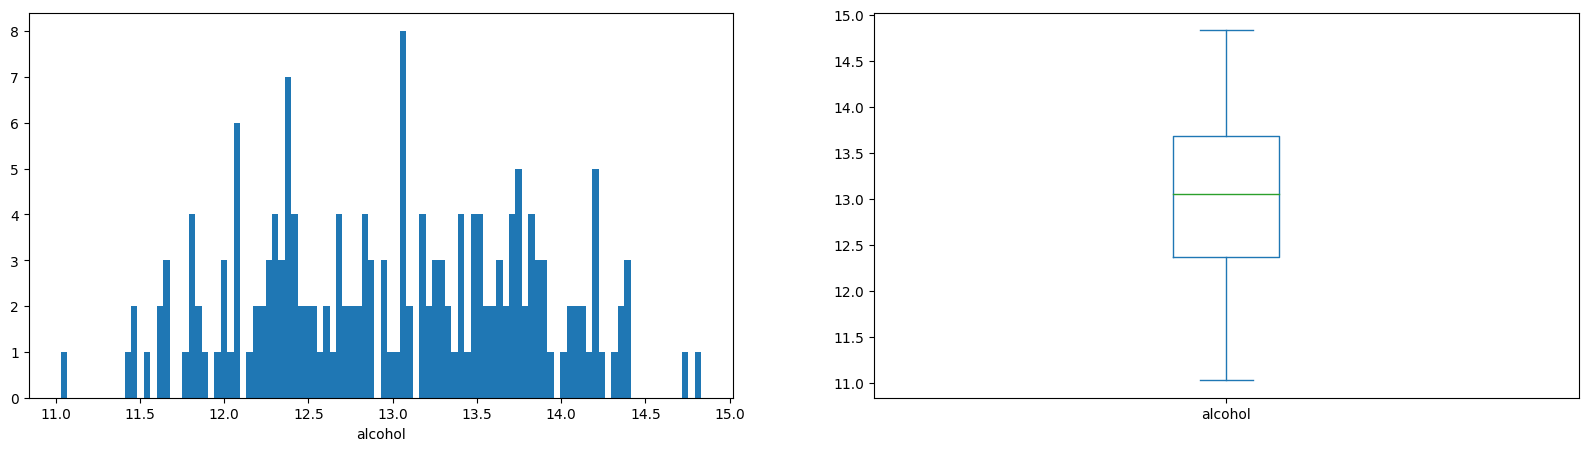

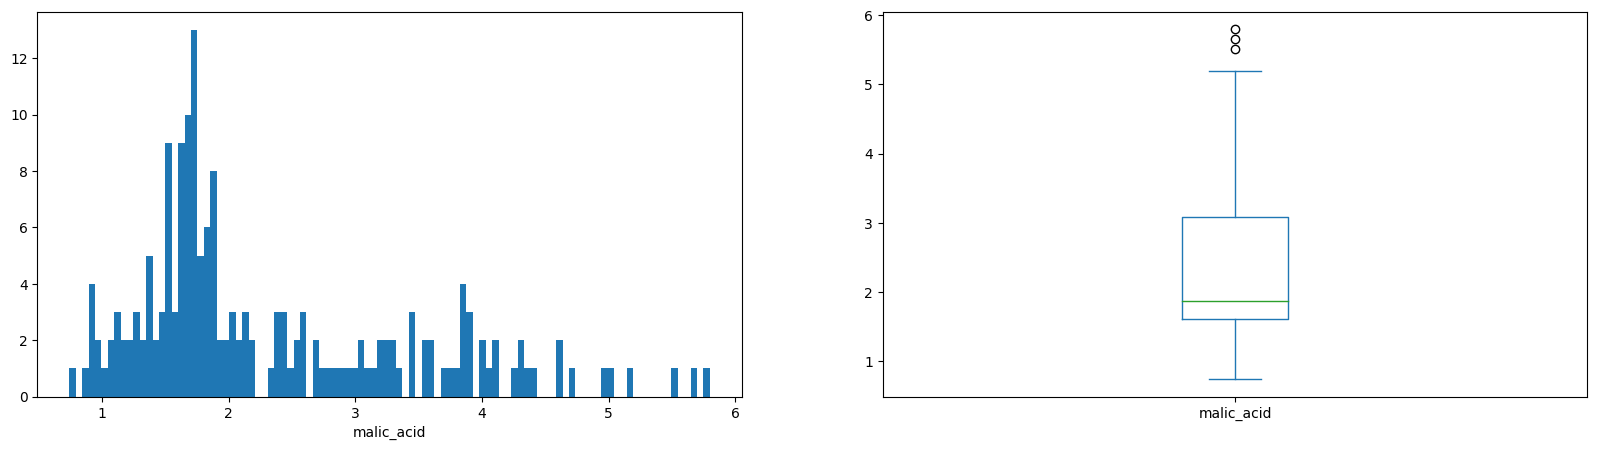

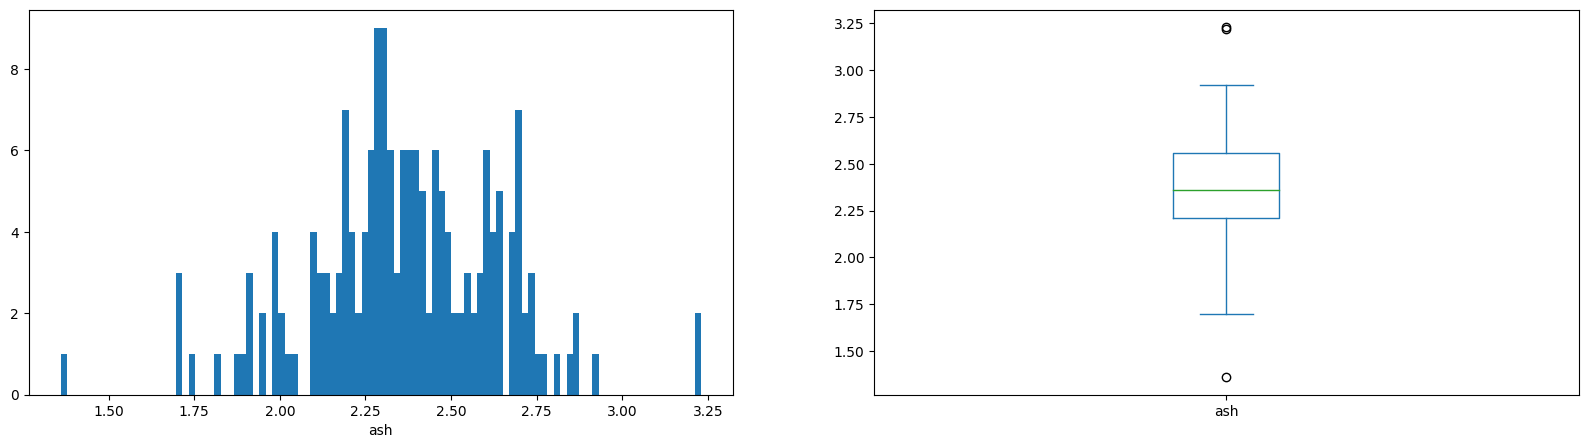

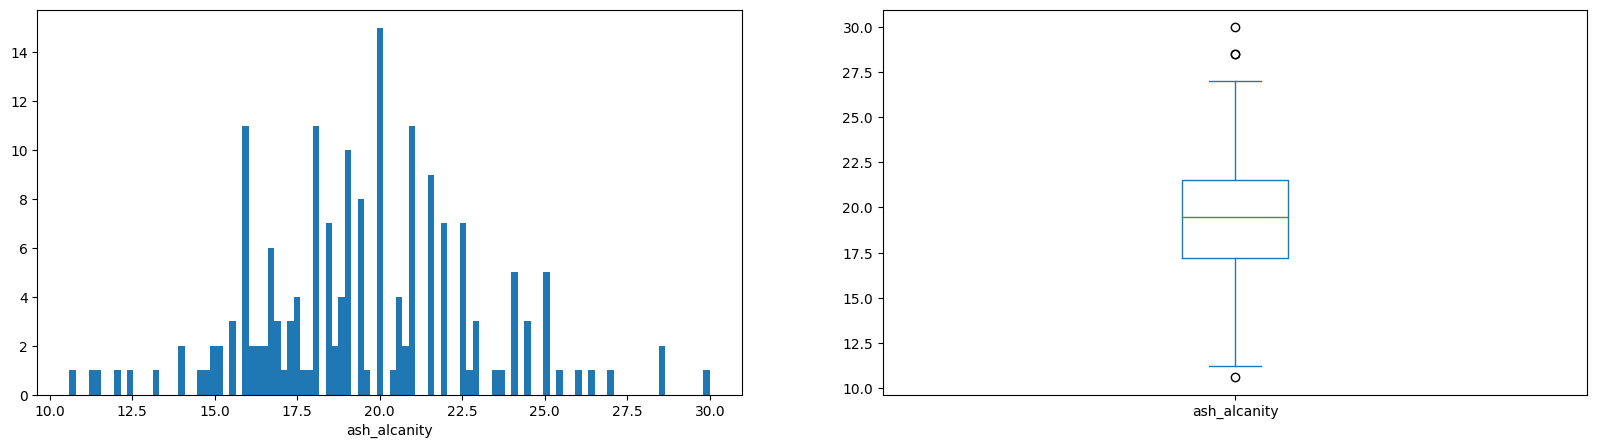

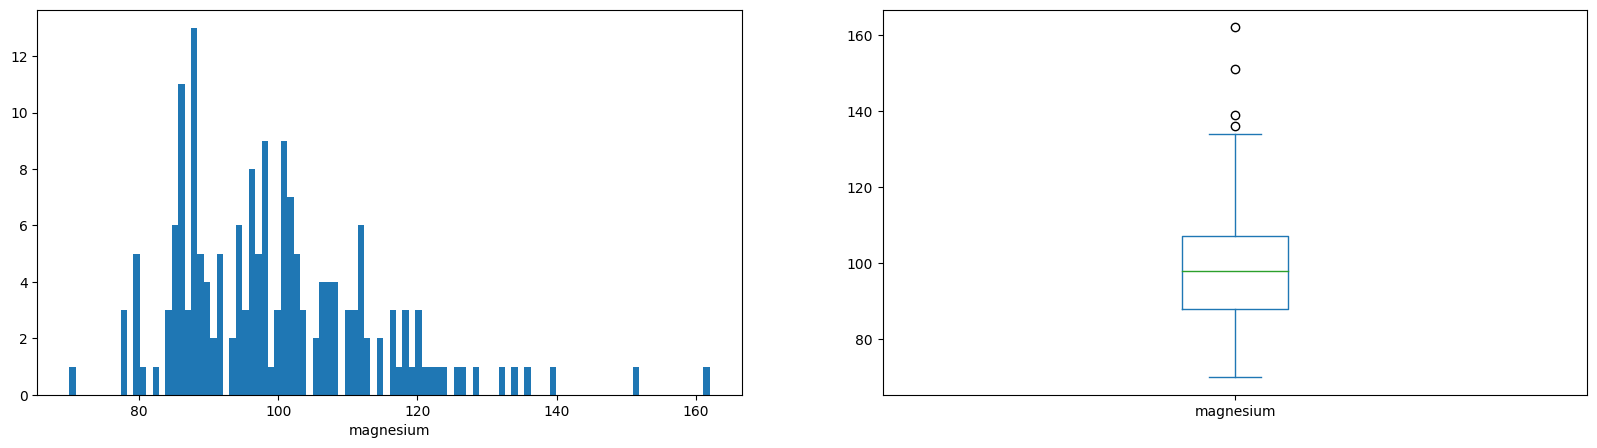

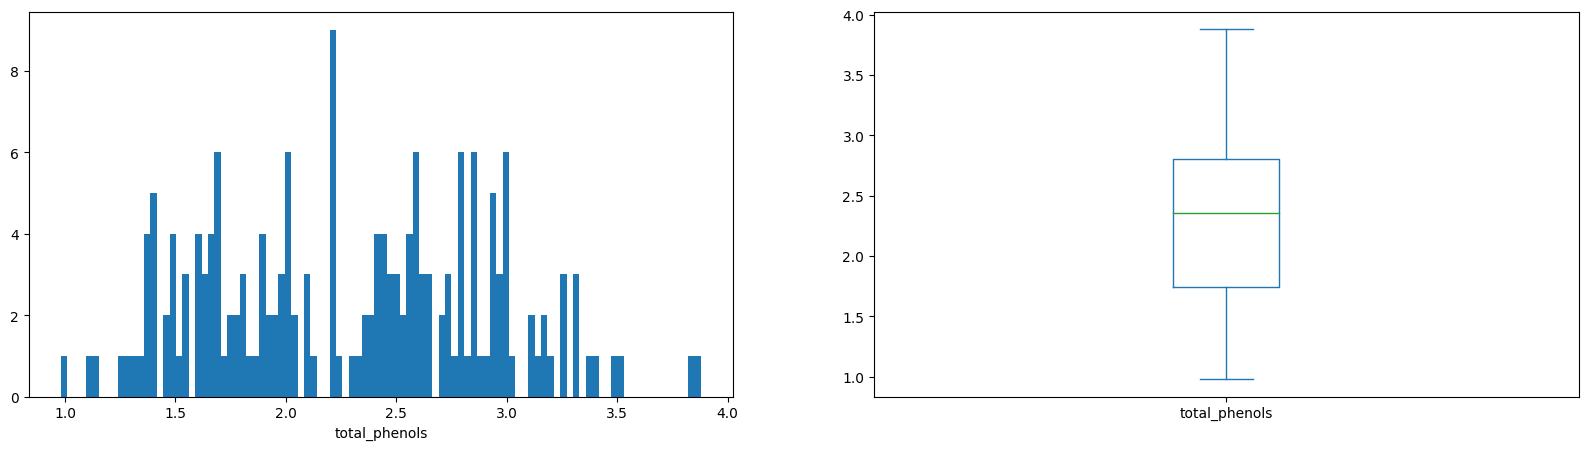

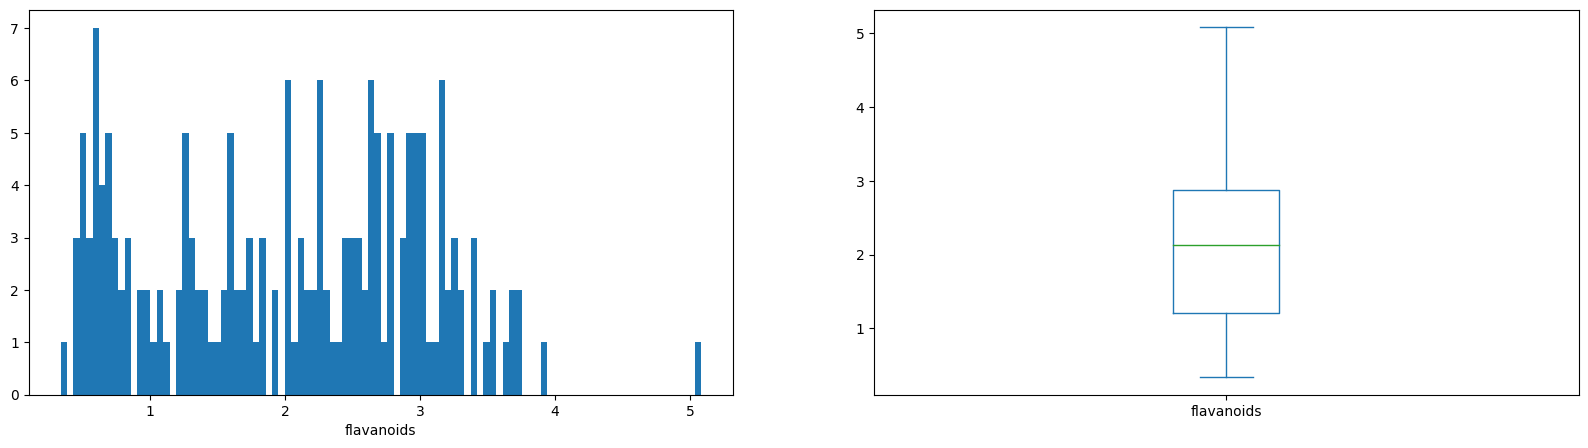

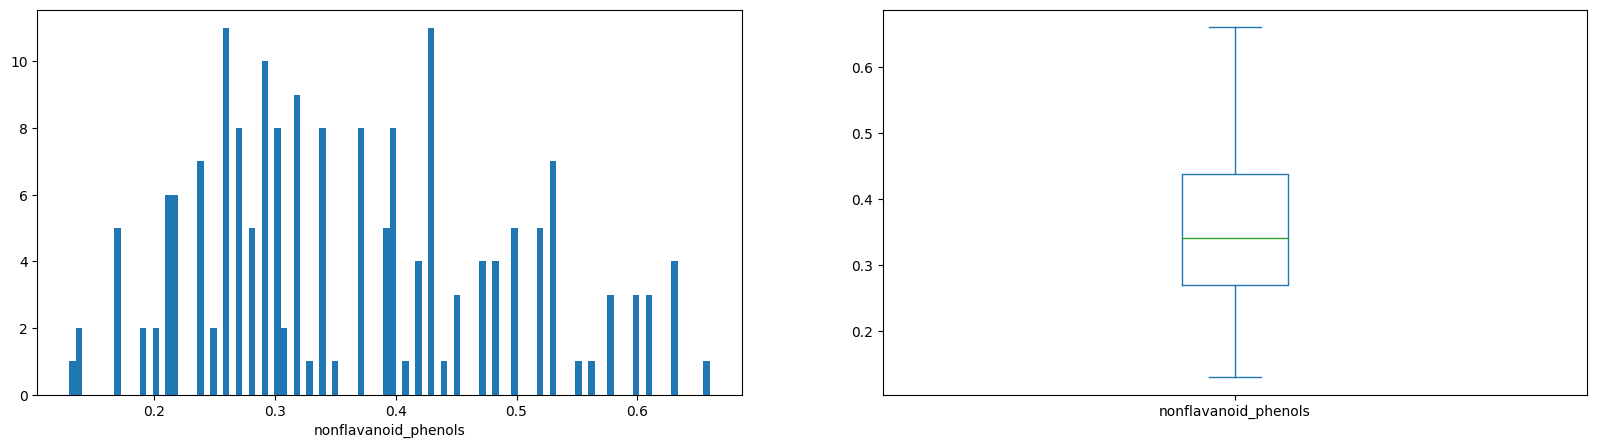

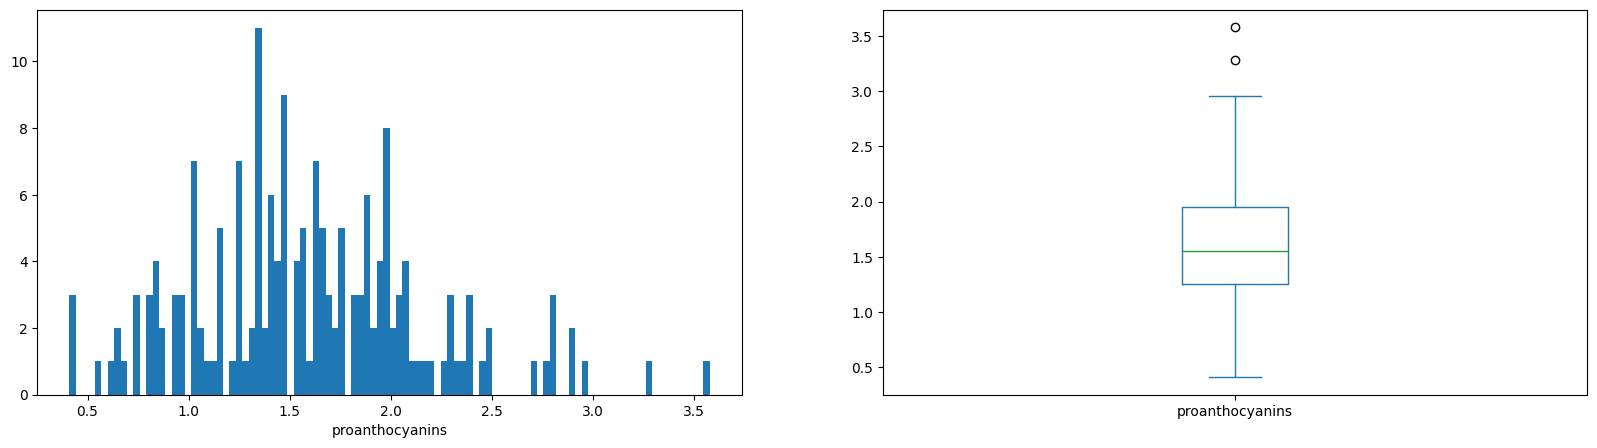

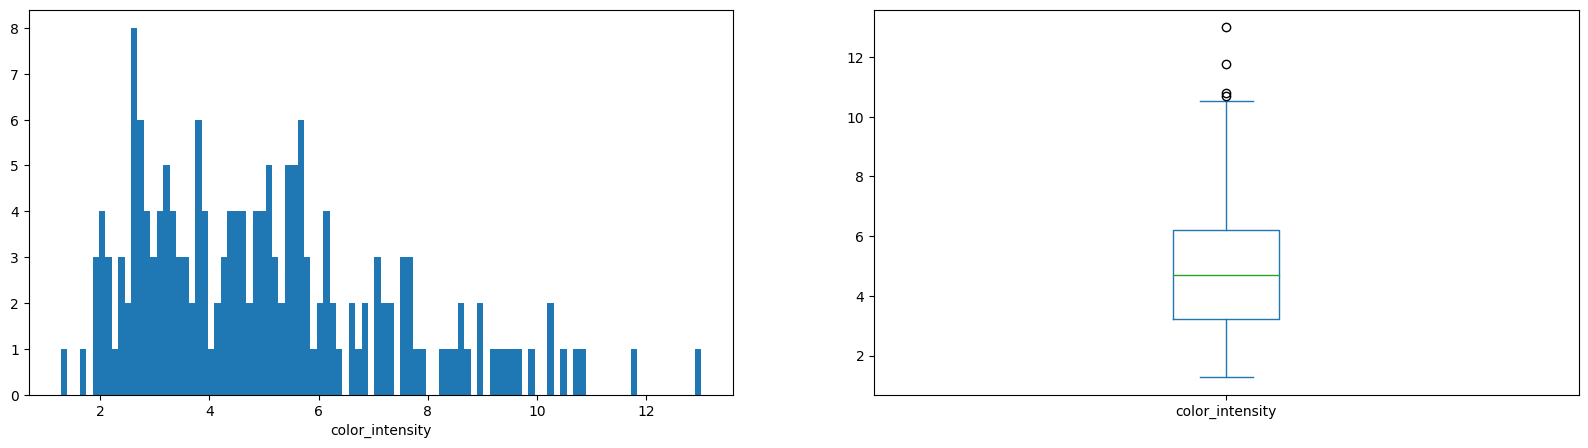

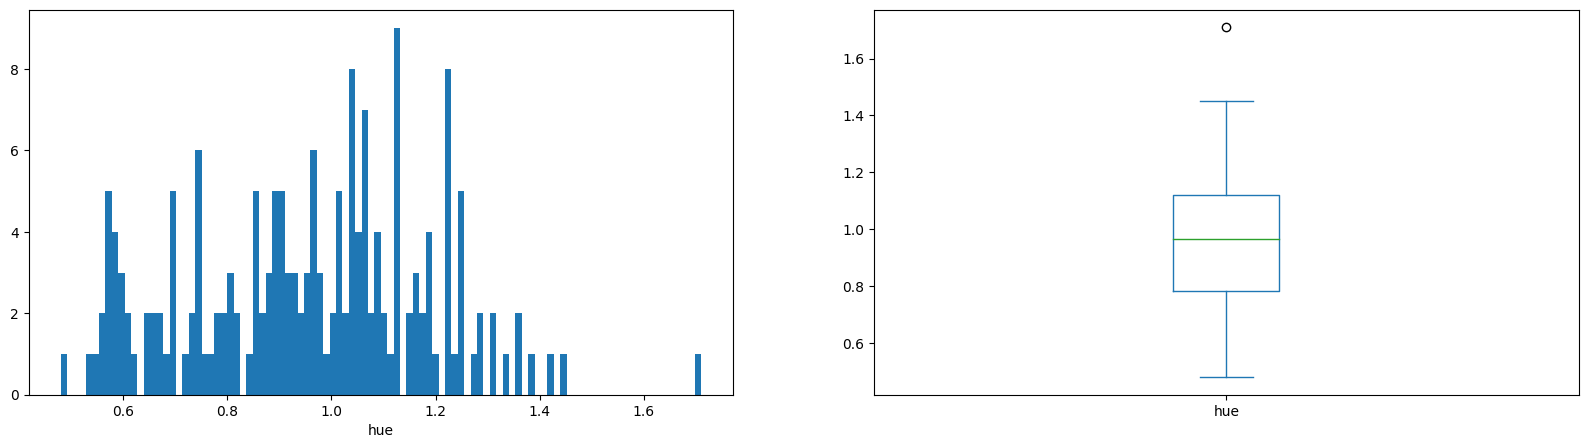

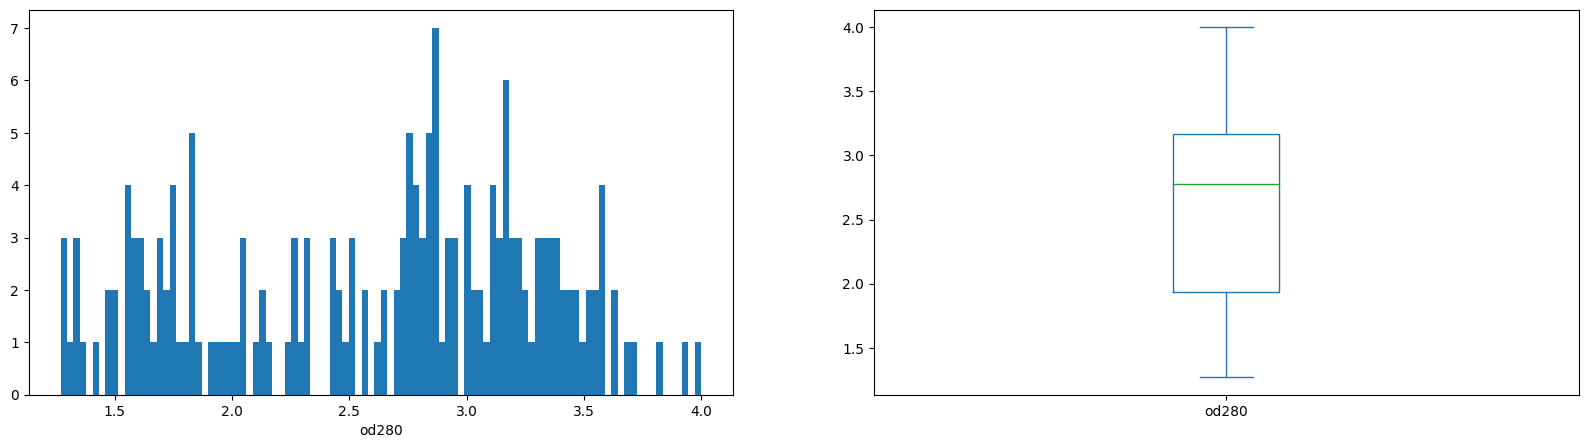

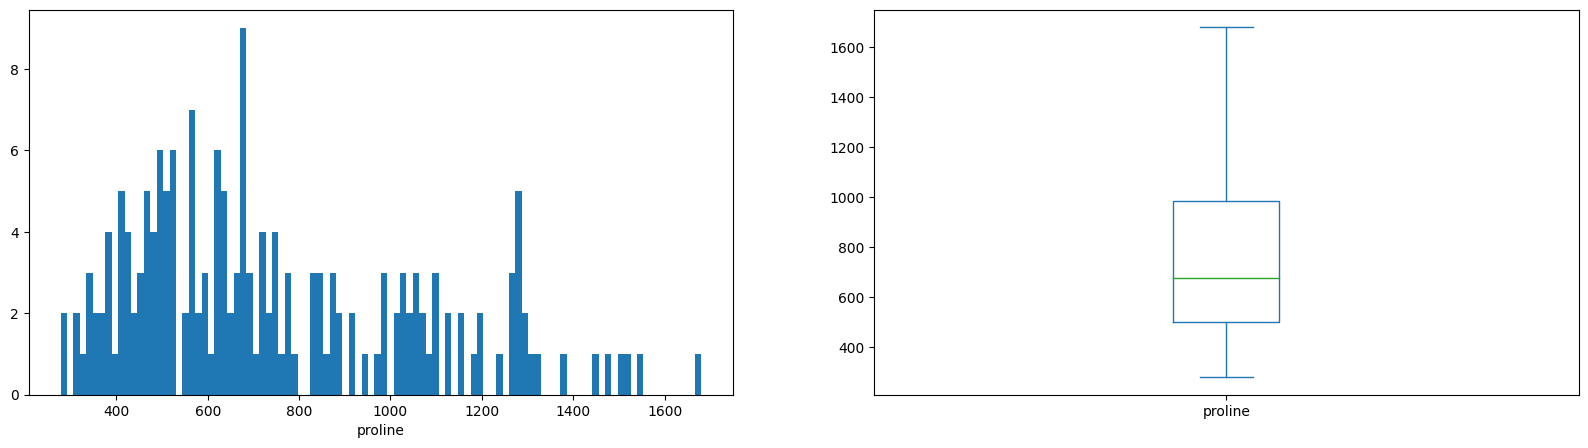

In [ ]:
for variable in wine: # se crea graficos para las variables del df
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(wine[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  wine[variable].plot(kind='box')

Alcohol: en la variable alcohol, encontramos que la mediana está alrededor del 13% y sus intervalos están entre 11% y 15%, no se observan datos atipicos y su comportamiento es simétrico. La mayor concentración de datos se encuentra apróximadamente entre 12.2% y 13.9%.

Malic_acid: en esta variable encontramos que hay un comportamiento asimétrico y un sesgo hacía la parte inferior, donde la mediana es de apróximadamente 1.9%, además se encuentran tres punto por fuera de los bigotes cercanos a 6%, mientras que el intervalo esta enre 0.8% y 5.2% apróximadamente. Estos puntos atípicos pueden deberse a una cosecha con mayor acidez. En este caso la mayor concentración de datos se encuentra entre 1% y 2%.

Ash: la variable ceniza tiene un comportamiento simétrico, su mediana es apróximadamente 2.375, con intervalos entre 1.75 y 2.9 apróximadamente, vemos que se presentan dos puntos atípicos, uno en la parte superior y otro en laparte inferior. El punto inferior es de un valor menor a 1.5 y el superior tiene un valor cercano a 3.25. La mayor concentración de datos, se encuentra entre los valores 2.1 y 2.6 apróximadamente.

Ash_alcanity: la alcalinidad de la ceniza tiene un comportamiento simétrico, su mediana es apróximadamente 20, con intervalos entre 11.3 y 27 apróximadamente, vemos que se presentan tres puntos atípicos, dos en la parte superior y uno en laparte inferior. El punto inferior es de un valor cercano a 10 y los dos puntos superiores tiene un valor por encima de 28. La mayor concentración de datos, se encuentra entre los valores 15.5 y 21 apróximadamente.

Magnesium: el magnesio tiene un comportamiento simétrico, su mediana es apróximadamente 100, con intervalos entre 70 y 138 apróximadamente, vemos que se presentan cuatro puntos atípicos en la parte superior, dos de ellos están cercanos al intervalo y deben tener valores entre 139 y 140,  mientras que dos de los puntos están por encima de 150. La mayor concentración de datos, se encuentra entre los valores 80 y 120 apróximadamente.

Total_phenols: el total de fenoles tiene un comportamiento levemente asimétrico hacía la parte superior, tiene una mediana de 2.4 apróximadamente, sus intervalos están entre 1 y 3.9 apróximadamente, no hay presencia de datos atípicos y la mayor concentración de datos esta entre 1.6 y 3.

Flavanoids:  los flavanoides tiene un comportamiento levemente asimétrico hacía la parte inferior, tiene una mediana de 2 apróximadamente, sus intervalos están entre 0.2 y 5 apróximadamente, no hay presencia de datos atípicos y la mayor concentración de datos esta entre 0.5 y 4.

Nonflavanoid_phenols: los fenoles no flavanoides son levemente asimétrico hacía la parte inferior, tiene una mediana de 0.35 apróximadamente, sus intervalos están entre 0.1 y 0.7 apróximadamente, no hay presencia de datos atípicos y la mayor concentración de datos esta entre 0.25 y 0.45.

Proanthocyanins: las proantocianidinas tiene un comportamiento simétrico, su mediana es apróximadamente 5, con intervalos entre 0.5 y 3 apróximadamente, vemos que se presentan dos puntos atípicos en la parte superior, que están por encima de 3.25. La mayor concentración de datos, se encuentra entre los valores 1 y 1.7 apróximadamente.

Color_intensity: la intensidad del color los tiene un comportamiento levemente asimétrico hacía la parte inferior, con una mediana de 2 apróximadamente, sus intervalos están entre 1.5 y 10.5 apróximadamente. Se evidencia que se presentan cuatro puntos atípicos en la parte superior, dos de ellos están cercanos al intervalo y deben tener valores entre 10 y 11,  mientras que dos de los puntos están por encima de 11. La mayor concentración de datos, se encuentra entre los valores 2 y 6 apróximadamente.

Hue: el tono tiene un comportamiento simétrico, su mediana es apróximadamente 1, con intervalos entre 0.3 y 1.5 apróximadamente, vemos que se presentan un punto atípico en la parte superior, que están por encima de 1.6. La mayor concentración de datos, se encuentra entre los valores 0.8 y 1.1 apróximadamente.

Od280: tiene un comportamiento levemente asimétrico hacía la parte superior, tiene una mediana de 2.7 apróximadamente, sus intervalos están entre 1.3 y 4 apróximadamente, no hay presencia de datos atípicos y la mayor concentración de datos esta entre  2.7 y 3.5.

Proline: tiene un comportamiento levemente asimétrico hacía la parte inferior, tiene una mediana de 700 apróximadamente, sus intervalos están entre 300 y 1700 apróximadamente, no hay presencia de datos atípicos y la mayor concentración de datos esta entre  400 y 700.

> Bloc con sangría



In [ ]:
wine.describe() #Análisis descriptivo con las medidas estadísticas del DF

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Text(0.5, 1.0, 'Correlación entre variables')

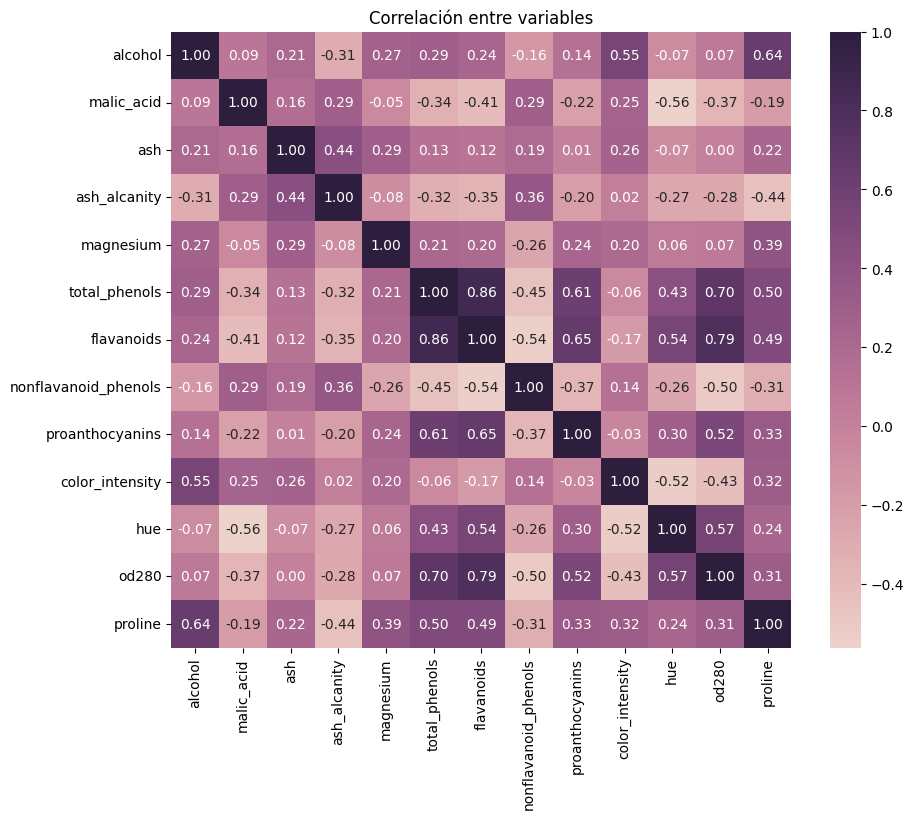

In [ ]:
#Análisis de correlación entre todas las variables
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(), annot = True, cmap = sns.cubehelix_palette(as_cmap=True), fmt = ".2f") #matriz de correlaciòn
plt.title("Correlación entre variables")

 Se puede notar que las variables 'flavonoids' y 'total_phenols' están altamente correlacionadas por lo que se decide eliminar la primera de ellas debido a que representa un tipo de fenol (phenol) y no es necesario explicar la presencia de fenoles 2 veces.

In [ ]:
# Eliminación de columnas altamente correlacionadas
wine.drop(['flavanoids'], axis=1, inplace=True)

In [ ]:
#Identificación de los quantiles para identificar outliers
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1
outliers = ((wine < (Q1 - 2 * IQR)) | (wine > (Q3 + 2 * IQR))).any(axis=1)

In [ ]:
data_clean = wine[~outliers]

In [ ]:
data_clean.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
print(data_clean.shape)

(173, 12)


En cuanto a la eliminación de outliers se hace bajo la recomendación de expertos que dicta que no se debe omitir mas del 10% de los datos ya que puede cambiar significativamente los resultados del caso de estudio.
En este caso se tenían 178 filas en el DF original y luego de la eliminación de outliers se tienen 173, lo que representa una reducción del 2.8% que cumple la recomendación dada anteriormente.

In [ ]:
#Por último se estandariza el DF para garantizar que las variables tengan el mismo peso
scaler = StandardScaler()
scaled_features =  pd.DataFrame(scaler.fit_transform(data_clean), columns = data_clean.columns)
scaled_features.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518188,-0.576024,0.201610,-1.200477,2.140652,0.813317,-0.676595,1.382237,0.255396,0.364523,1.829017,0.996276
1,0.233212,-0.513163,-0.924756,-2.543515,0.067464,0.573970,-0.838491,-0.542671,-0.308763,0.408611,1.099583,0.949008
2,0.183310,0.007682,1.133775,-0.284769,0.144249,0.813317,-0.514699,2.373279,0.273306,0.320436,0.776949,1.374422
3,1.692845,-0.360502,0.473491,-0.834194,1.065666,2.488742,-1.000387,1.172593,1.222527,-0.429049,1.169721,2.304031
4,0.283114,0.214225,1.910580,0.447797,1.449589,0.813317,0.213834,0.486487,-0.335628,0.364523,0.440287,-0.043625


#### Reducción de dimensionalidad

In [ ]:
#Se crea un dataset reducido que proporciona el 85% de la varianza de entrada que debe explicarse
pca = PCA(n_components=0.85).fit(scaled_features)

#Componentes conservadas de PCA:
pca.n_components_

6

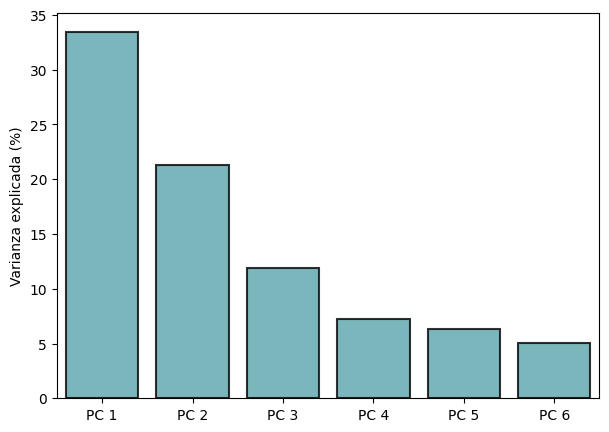

In [ ]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})

fig, ax = plt.subplots(1, 1, figsize = (7, 5))

bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, len(PCA_variance) + 1)],
                  y = PCA_variance['Varianza explicada (%)'],
                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',
                  alpha = 0.8)

plt.show()

In [ ]:
PCA_variance

,Varianza explicada (%)
0,33.470550
1,21.330124
2,11.899387
3,7.254621
4,6.350213
5,5.025412


In [ ]:
#Se crea un dataset que contenga sólo 3 componentes ya que 6 puede ser un número de grupos muy grande
pca = PCA(n_components=3).fit(scaled_features)

#Por último, se transforma el DF original que tenía 12 características
X_pca = pca.fit_transform(scaled_features)
X_pca[:3]

array([[ 3.33304997, -1.43913651,  0.15182742],
       [ 2.1542934 ,  0.32355322, -1.91106895],
       [ 2.32826103, -0.84167095,  0.94017796]])

In [ ]:
df_final = scaled_features.copy()
df_final['PCA1'] = X_pca[:,0]
df_final['PCA2'] = X_pca[:,1]
df_final['PCA3'] = X_pca[:,2]
df_final.head(3)

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,PCA1,PCA2,PCA3
0,1.518188,-0.576024,0.201610,-1.200477,2.140652,0.813317,-0.676595,1.382237,0.255396,0.364523,1.829017,0.996276,3.333050,-1.439137,0.151827
1,0.233212,-0.513163,-0.924756,-2.543515,0.067464,0.573970,-0.838491,-0.542671,-0.308763,0.408611,1.099583,0.949008,2.154293,0.323553,-1.911069
2,0.183310,0.007682,1.133775,-0.284769,0.144249,0.813317,-0.514699,2.373279,0.273306,0.320436,0.776949,1.374422,2.328261,-0.841671,0.940178


In [ ]:
# --- Pesos de las variables que componen las componentes principales ---
pesos_pca = pd.DataFrame(pca.components_, columns = scaled_features.columns,
             index = ['PC 1', 'PC 2', 'PC 3']).round(2).T

pesos_pca

,PC 1,PC 2,PC 3
alcohol,0.19,-0.46,-0.19
malic_acid,-0.27,-0.24,0.02
ash,-0.00,-0.28,0.67
ash_alcanity,-0.29,0.04,0.56
magnesium,0.16,-0.36,0.27
total_phenols,0.42,-0.02,0.15
nonflavanoid_phenols,-0.33,-0.02,0.11
proanthocyanins,0.35,0.00,0.10
color_intensity,-0.07,-0.52,-0.17
hue,0.32,0.29,0.15


Luego de encontrar la cantidad de componentes que explican al menos el 85% de la varianza del DF, se procede a realizar otro dataset que sólamente contenga 3 componentes debido a que los primeros 3 explican el 66,70% de la varianza y así se puede sintetizar mas información en menos componentes y se puede hacer más fácil explicar.

# K-MEANS

Se realiza el procesamiento de los datos con los datos escalados

## Procesamiento de los datos

In [ ]:
# Creación de modelo de Kmeans
kmeans = KMeans(init="random",
                n_clusters=3,
                n_init=10,
                max_iter=100,
                random_state=42)

In [ ]:
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=100, n_clusters=3, n_init=10, random_state=42)

In [ ]:
# el valor del SSE mas bajo
print("valor del SSE mas bajo: ", kmeans.inertia_)

# Coordenadas de los centroides
print(kmeans.cluster_centers_)

# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)

valor del SSE mas bajo:  1163.3036708277946
[[ 0.12093293  0.88755249  0.13169753  0.49846604 -0.0338918  -1.0031632
   0.70276017 -0.85751775  0.91779121 -1.15913572 -1.2971674  -0.41156132]
 [ 0.86843976 -0.32605341  0.27801691 -0.70809629  0.63265     0.86484816
  -0.59830074  0.66644958  0.17377438  0.47943971  0.74820391  1.13043554]
 [-0.95195923 -0.39497365 -0.37974044  0.29468664 -0.59511387 -0.04189641
   0.02190865  0.03584618 -0.91112577  0.46308006  0.30996664 -0.78029842]]
Numero de iteraciones:  5


In [ ]:
# Etiqueta de los datos generadas por Kmeans
kmeans.labels_[:5]

array([1, 1, 1, 1, 1], dtype=int32)

In [ ]:
#Predecir valores de etiquetas
label = kmeans.fit_predict(scaled_features)

print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


##Elección del número apropiado de clusteres

In [ ]:
# Argumentos del algoritmo
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

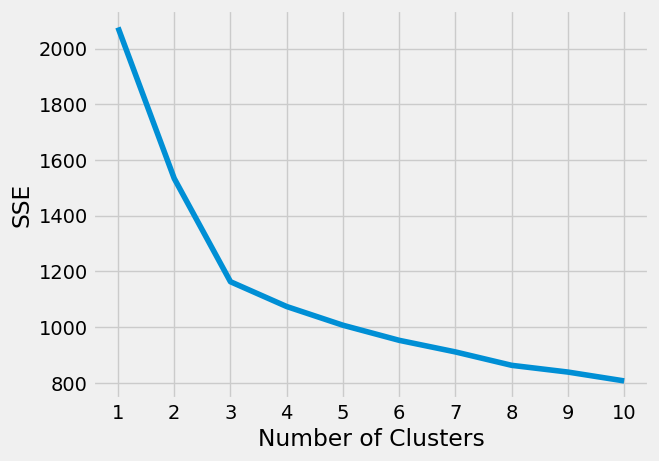

In [ ]:
# Visualización de resultados
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Con un análisis visual se podría decir que el codo se encuentra en 3 por lo que el número ideal de clusters es 3.

In [ ]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 11),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

3

El KneeLocator corrobora la afirmación anterior por lo que se va a trabajar con 3 clusters.

##Coeficiente de silueta

In [ ]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

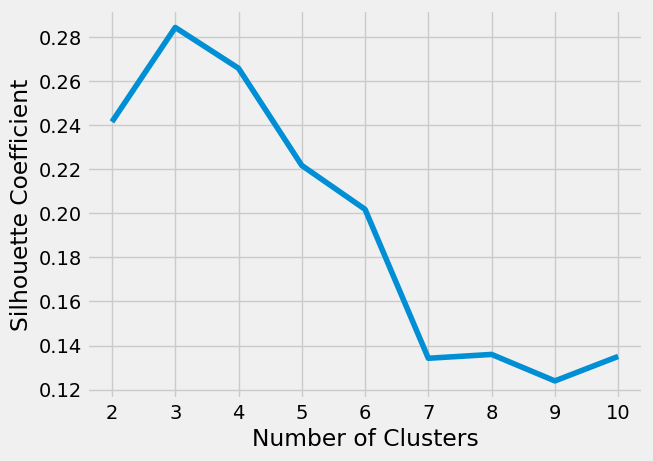

In [ ]:
# Visualización de resultados
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

El coeficiente de siluetas también corrobora que la cantidad de clusters que se deben usar es 3 ya que su punto mas alto está ubicado en este valor.

In [ ]:
#Se crea el modelo K-Means con los 3 clusters
kmeans_constants = {"init": "random", "n_init": 100, "max_iter": 500, "random_state": 42}
# --- Modelo K-means ---
model_kmeans = KMeans(n_clusters = 3, **kmeans_constants)
model_kmeans.fit(scaled_features)

KMeans(init='random', max_iter=500, n_clusters=3, n_init=100, random_state=42)

In [ ]:
# --- Evaluación del modelo kmeans ---
print(" ### K-MEANS ###")
print('Inertia: ', model_kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(scaled_features, model_kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(scaled_features, model_kmeans.labels_))

 ### K-MEANS ###
Inertia:  1163.3036708277946
Silhouette Score:  0.28427481360421053
Calinski harabasz score:  66.68868148970328


Según las métricas calculadas se tiene un indicio de que el agrupamiento es malo de acuerdo al Silhouette Score y el Calinski harabasz score pero esta afirmación no está apoyada de la otra métrica ya que la inertia es baja e indica que los datos no están tan dispersos dentro de cada cluster.

In [ ]:
# Predicción de los clusters
Cluster_1 = model_kmeans.fit_predict(scaled_features) #Cluster asociado al modelo K_means con todas las características

df_final = scaled_features.copy()
df_final['Cluster_1']= Cluster_1

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,Cluster_1
0,1.518188,-0.576024,0.201610,-1.200477,2.140652,0.813317,-0.676595,1.382237,0.255396,0.364523,1.829017,0.996276,1
1,0.233212,-0.513163,-0.924756,-2.543515,0.067464,0.573970,-0.838491,-0.542671,-0.308763,0.408611,1.099583,0.949008,1
2,0.183310,0.007682,1.133775,-0.284769,0.144249,0.813317,-0.514699,2.373279,0.273306,0.320436,0.776949,1.374422,1


## **Dataset reducido a 3 componentes**

Al hacer un análisis de las gráficas anteriores se encuentra que probablemente tomando solo 3 componentes el modelo podría mejorar las métricas.

## Elección de número apropiado de clusters

In [ ]:
# Argumentos del algoritmo
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X_pca)
  sse.append(kmeans.inertia_)

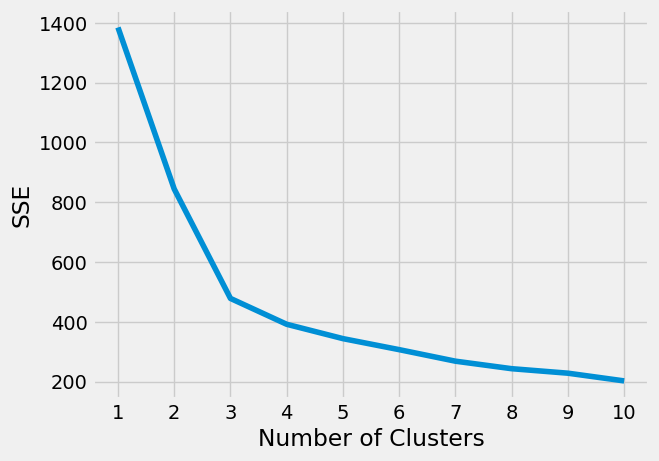

In [ ]:
# Visualización de resultados
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Con un análisis visual se podría decir que el codo se encuentra en 3 por lo que el número ideal de clusters es 3.


In [ ]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 11),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

3

El KneeLocator corrobora la afirmación anterior por lo que se va a trabajar con 3 clusters.

##Coeficiente de silueta

In [ ]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X_pca)
  score = silhouette_score(X_pca, kmeans.labels_)
  silhouette_coefficients.append(score)

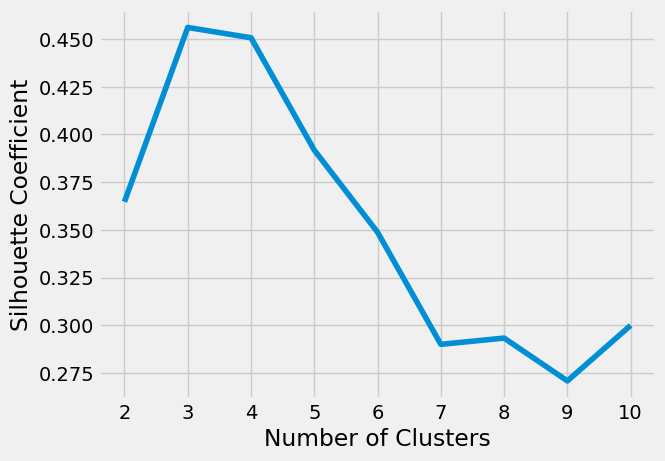

In [ ]:
# Visualización de resultados
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

El coeficiente de siluetas también corrobora que la cantidad de clusters que se deben usar es 3 ya que su punto mas alto está ubicado en este valor.

In [ ]:
#Se crea el modelo K-Means con los 3 clusters
kmeans_constants = {"init": "random", "n_init": 100, "max_iter": 500, "random_state": 42}
# --- Modelo K-means ---
model_kmeans = KMeans(n_clusters = 3, **kmeans_constants)
model_kmeans.fit(X_pca)

KMeans(init='random', max_iter=500, n_clusters=3, n_init=100, random_state=42)

In [ ]:
# --- Evaluación del modelo kmeans ---
print(" ### K-MEANS ###")
print('Inertia: ', model_kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(X_pca, model_kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(X_pca, model_kmeans.labels_))

 ### K-MEANS ###
Inertia:  478.5475161192927
Silhouette Score:  0.4561077274802859
Calinski harabasz score:  160.95034442444768


Se puede ver que las métricas mejoraron ya que la inercia bajó, y el Calinski y Silhouette Score subieron por lo que se corrobora que el modelo en general mejoró con la reducción a 3 componentes

In [ ]:
# Predicción de los clusters
Cluster_2 = model_kmeans.fit_predict(X_pca) #Cluster asociado al modelo K_means con 6 componentes

df_final['Cluster_2']= Cluster_2

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,Cluster_1,Cluster_2
0,1.518188,-0.576024,0.201610,-1.200477,2.140652,0.813317,-0.676595,1.382237,0.255396,0.364523,1.829017,0.996276,1,1
1,0.233212,-0.513163,-0.924756,-2.543515,0.067464,0.573970,-0.838491,-0.542671,-0.308763,0.408611,1.099583,0.949008,1,1
2,0.183310,0.007682,1.133775,-0.284769,0.144249,0.813317,-0.514699,2.373279,0.273306,0.320436,0.776949,1.374422,1,1


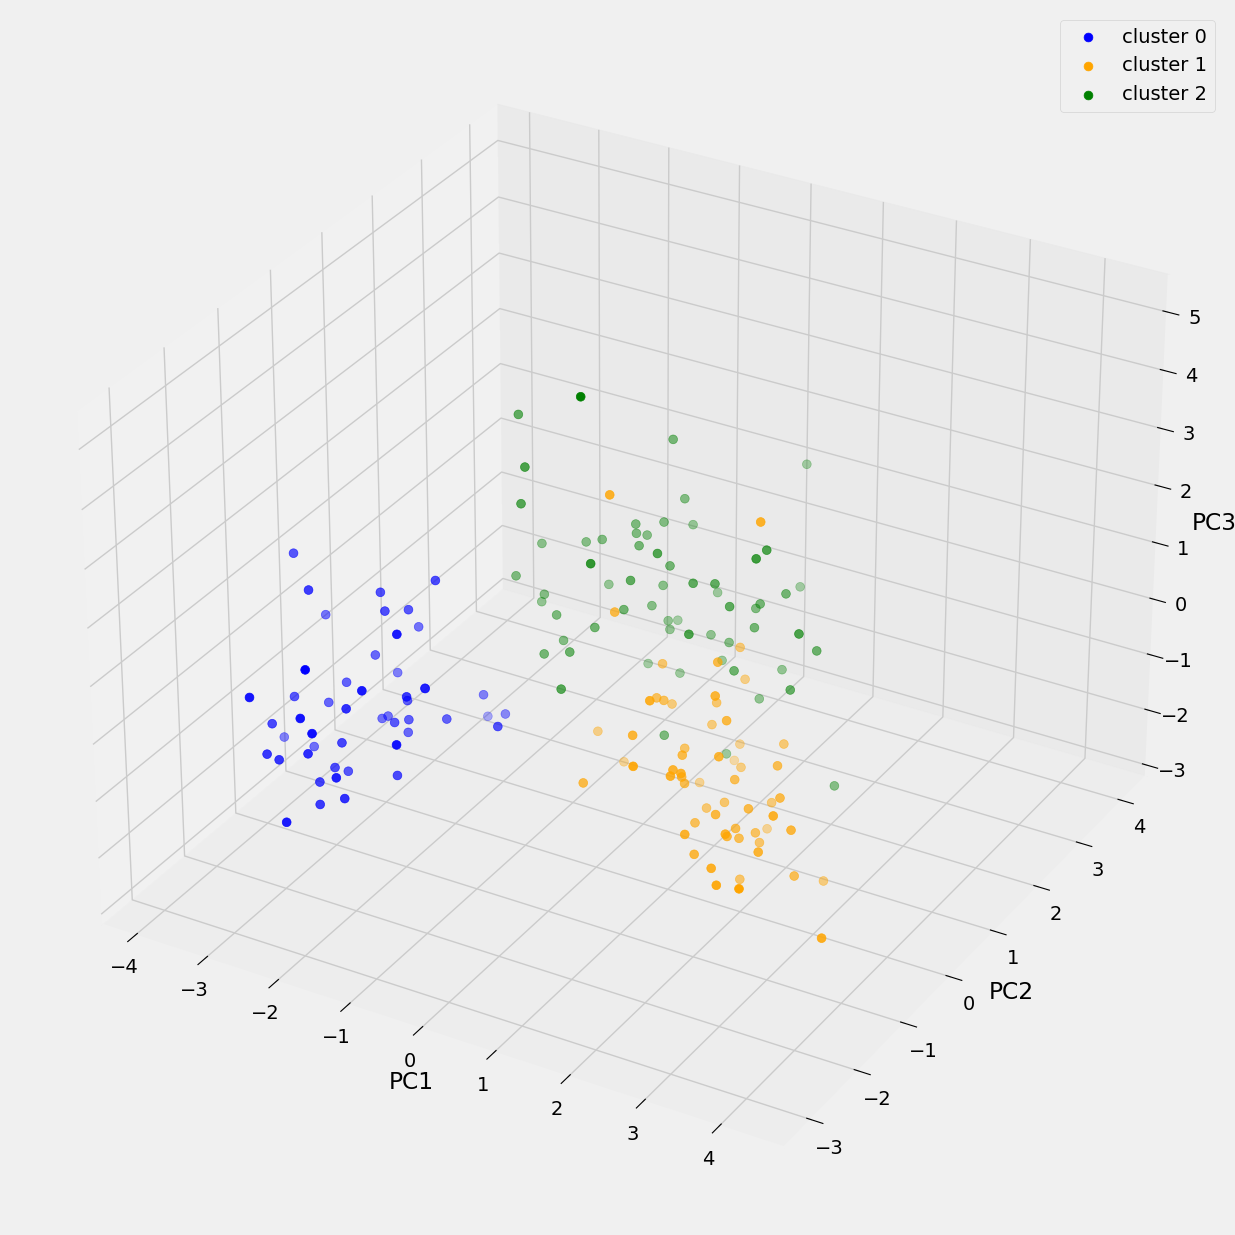

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[Cluster_2== 0,0],X_pca[Cluster_2== 0,1],X_pca[Cluster_2== 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X_pca[Cluster_2== 1,0],X_pca[Cluster_2== 1,1],X_pca[Cluster_2== 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X_pca[Cluster_2== 2,0],X_pca[Cluster_2== 2,1],X_pca[Cluster_2== 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

En la gráfico tridimensional de dispersión para K-MEANS vemos que hay solapamiento de algunos puntos,  no es posible apreciar tendencias que apunten a alguna dirección en particular, o aglomeración de observaciones. Adicionalmente, se aprecia gran dispersión entre el conjunto de observaciones, y en consecuencia, no es posible detectar observaciones extremas. También se evidencia que los puntos están agrupos en tres conjuntos.

# **HIERARCHICAL CLUSTERING**


Se aplica un nuevo modelo con el dataset escalado.

## Dataset original escalado

In [ ]:
# Separación de caracteristicas
X = scaled_features.iloc[:,0:13]
print(X.shape)
X.head()

(173, 12)


,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518188,-0.576024,0.201610,-1.200477,2.140652,0.813317,-0.676595,1.382237,0.255396,0.364523,1.829017,0.996276
1,0.233212,-0.513163,-0.924756,-2.543515,0.067464,0.573970,-0.838491,-0.542671,-0.308763,0.408611,1.099583,0.949008
2,0.183310,0.007682,1.133775,-0.284769,0.144249,0.813317,-0.514699,2.373279,0.273306,0.320436,0.776949,1.374422
3,1.692845,-0.360502,0.473491,-0.834194,1.065666,2.488742,-1.000387,1.172593,1.222527,-0.429049,1.169721,2.304031
4,0.283114,0.214225,1.910580,0.447797,1.449589,0.813317,0.213834,0.486487,-0.335628,0.364523,0.440287,-0.043625


##Uso del dendograma para identificar el número óptimo de clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Función de vinculación para agrupar datos según similud
Z = linkage(X, method='ward', metric='euclidean')
Z[:5]

array([[  9.        ,  47.        ,   1.18672745,   2.        ],
       [127.        , 129.        ,   1.19773587,   2.        ],
       [ 11.        ,  12.        ,   1.20063953,   2.        ],
       [ 90.        , 104.        ,   1.22095036,   2.        ],
       [ 62.        ,  95.        ,   1.22327126,   2.        ]])

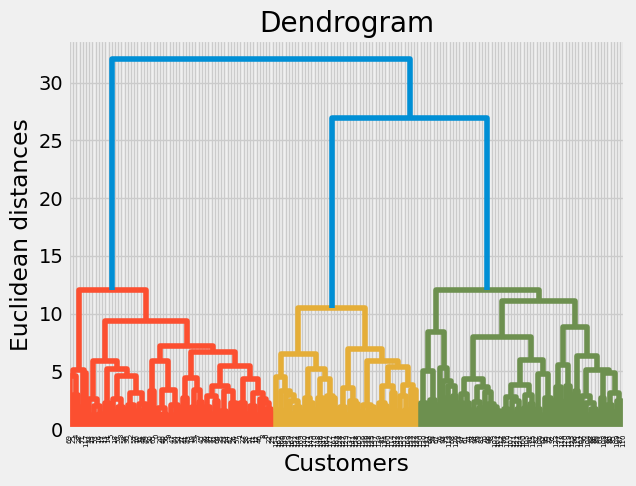

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Vemos que el dendograma muestra que se eligen dos clusteres, donde hay una subdivisión cercana a la inicial, que es equivalente a los 3 que se mostraron en los modelos anteriores.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)

print(hc.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
df_final['cluster_3'] = y_hc
df_final.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,Cluster_1,Cluster_2,cluster_3
0,1.518188,-0.576024,0.201610,-1.200477,2.140652,0.813317,-0.676595,1.382237,0.255396,0.364523,1.829017,0.996276,1,1,1
1,0.233212,-0.513163,-0.924756,-2.543515,0.067464,0.573970,-0.838491,-0.542671,-0.308763,0.408611,1.099583,0.949008,1,1,1
2,0.183310,0.007682,1.133775,-0.284769,0.144249,0.813317,-0.514699,2.373279,0.273306,0.320436,0.776949,1.374422,1,1,1
3,1.692845,-0.360502,0.473491,-0.834194,1.065666,2.488742,-1.000387,1.172593,1.222527,-0.429049,1.169721,2.304031,1,1,1
4,0.283114,0.214225,1.910580,0.447797,1.449589,0.813317,0.213834,0.486487,-0.335628,0.364523,0.440287,-0.043625,1,1,1


In [ ]:
###Metricas de evaluación
print(" ### Hierarchical Clustering ###")
# Calcula el índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(X, y_hc)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Calcula el índice de silueta
silhouette_avg = silhouette_score(X, y_hc)
print(f"Puntuación de silueta: {silhouette_avg}")

 ### Hierarchical Clustering ###
Índice de Calinski-Harabasz: 61.96948513908285
Puntuación de silueta: 0.2676034398174304


In [ ]:
# Predicción de los clusters en el modelo jerárquico
y_hc = hc.fit_predict(X)

# Añade la columna de clusters a tu DataFrame
df_final['Cluster'] = y_hc

# A partir de ahora, solo trabajaremos con "df_final"
df_final.head(3)

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,Cluster_1,Cluster_2,cluster_3,Cluster
0,1.518188,-0.576024,0.201610,-1.200477,2.140652,0.813317,-0.676595,1.382237,0.255396,0.364523,1.829017,0.996276,1,1,1,1
1,0.233212,-0.513163,-0.924756,-2.543515,0.067464,0.573970,-0.838491,-0.542671,-0.308763,0.408611,1.099583,0.949008,1,1,1,1
2,0.183310,0.007682,1.133775,-0.284769,0.144249,0.813317,-0.514699,2.373279,0.273306,0.320436,0.776949,1.374422,1,1,1,1


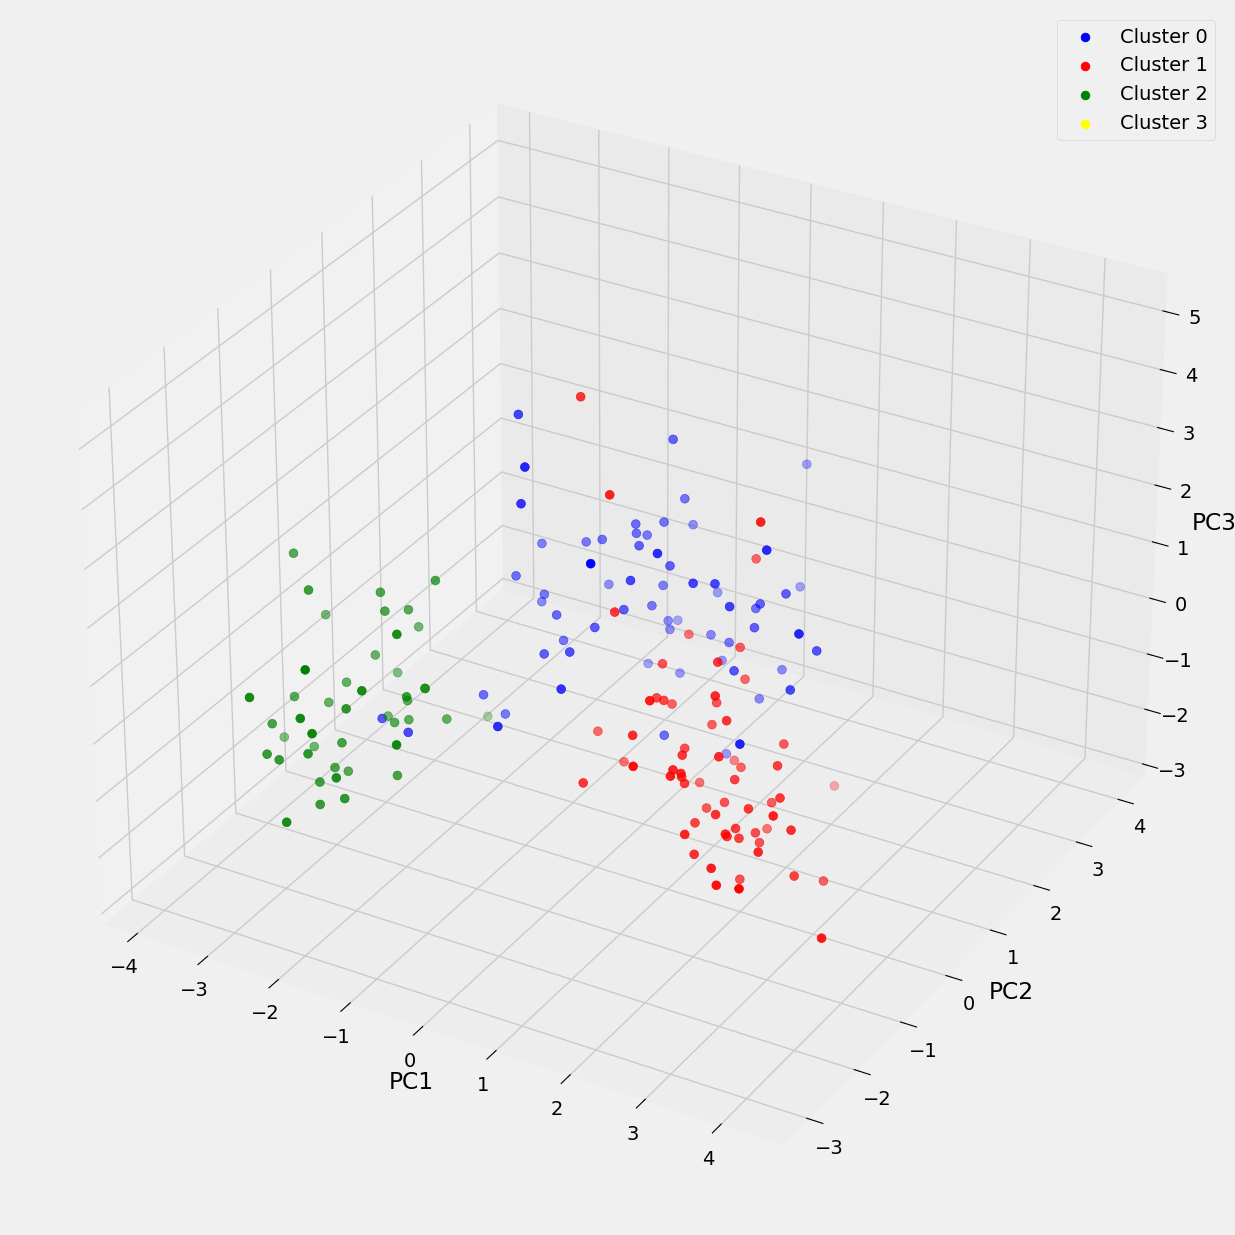

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Suponiendo que df_final contiene tus datos con la columna "Cluster" que especifica las etiquetas de los clusters
# y que X_pca contiene tus características reducidas en PCA

# Define los colores para los clusters
colors = ['blue', 'red', 'green', 'yellow']  # Puedes ampliar la lista de colores según tus clusters

# Itera a través de los clusters y dibuja los puntos en el gráfico 3D
for cluster_label, color in enumerate(colors):
    cluster_data = X_pca[df_final['Cluster'] == cluster_label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], s=40, color=color, label=f'Cluster {cluster_label}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

En la gráfico tridimensional de dispersión para HC vemos que hay solapamiento de algunos puntos,  no es posible apreciar tendencias que apunten a alguna dirección en particular, o aglomeración de observaciones. Adicionalmente, se aprecia gran dispersión entre el conjunto de observaciones, y en consecuencia, no es posible detectar observaciones extremas. En este caso se evidencian un cluster menos.

#DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors

# --- Selección de hiperparámetros eps ---

# --- Gráfica de distancias K --
neighbors = NearestNeighbors(n_neighbors = 2)
neighbors.fit(scaled_features)

distances, *other = neighbors.kneighbors(scaled_features)
distances = distances[:, 1]
print(distances.shape)
distances = np.sort(distances, axis = 0)
distances

(173,)


array([1.18672745, 1.18672745, 1.19773587, 1.19773587, 1.20063953,
       1.20063953, 1.22095036, 1.22095036, 1.22327126, 1.22327126,
       1.24321997, 1.24321997, 1.26513324, 1.26513324, 1.2951932 ,
       1.2951932 , 1.2978042 , 1.2978042 , 1.30005622, 1.30005622,
       1.32218988, 1.32218988, 1.32912678, 1.32912678, 1.33718922,
       1.33718922, 1.33768206, 1.33768206, 1.36353819, 1.36353819,
       1.37423639, 1.38708324, 1.38708324, 1.39022282, 1.39798113,
       1.39798113, 1.40278513, 1.40278513, 1.40606855, 1.43778   ,
       1.47315176, 1.47505796, 1.47568833, 1.47586646, 1.47586646,
       1.50242442, 1.50308417, 1.50622841, 1.50978762, 1.50978762,
       1.5101077 , 1.5101077 , 1.51243793, 1.51530069, 1.51530069,
       1.53564029, 1.55437037, 1.55437037, 1.56191619, 1.56778312,
       1.56778312, 1.57049762, 1.58360133, 1.58360133, 1.60054663,
       1.61065488, 1.61171369, 1.6172587 , 1.61907717, 1.61907717,
       1.62510482, 1.62548556, 1.62548556, 1.63560377, 1.63666

<ipython-input-58-7c4641ef92c6>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


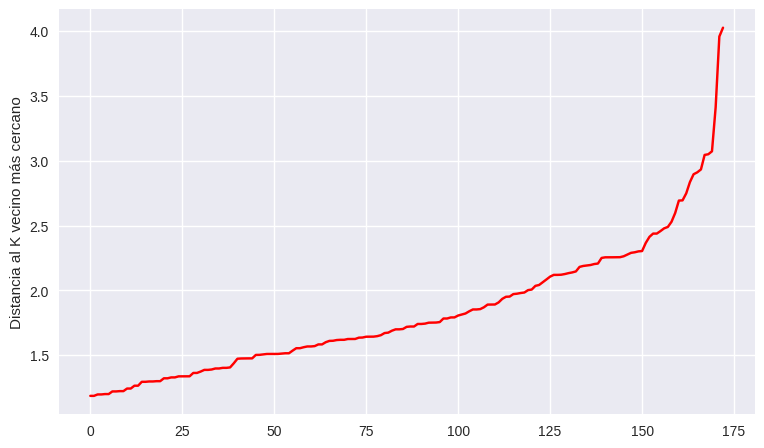

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (8, 5))
plt.plot(distances, color = 'red')
plt.ylabel('Distancia al K vecino más cercano')
plt.show()

El comportamiento de las distancias de k, es inestable, esto podría decirnosque las distancias al k-vecino más cercano son altamente variables, lo que podría significar que en ciertas regiones del espacio de características o en ciertos puntos del conjunto de datos, los puntos de datos están muy dispersos o no siguen un patrón claro en relación con su vecino más cercano. La parte final del gráfico donde la línea muestra un ascenso exponencial sugiere que a medida que el parámetro aumenta o las posiciones en el conjunto de datos avanzan,el aumento exponencial indica que a medida que te alejas más de ciertos puntos de referencia, la influencia del vecino más cercano se vuelve mucho más significativa.

In [ ]:
# --- Selección del punto de curvatura máxima ---
kl = KneeLocator(range(len(distances)), distances, curve = 'convex', direction = 'increasing')
kl.elbow

150

In [ ]:
# --- Epsilon óptimo --
epsilon = distances[kl.elbow]
epsilon

2.303597021291516

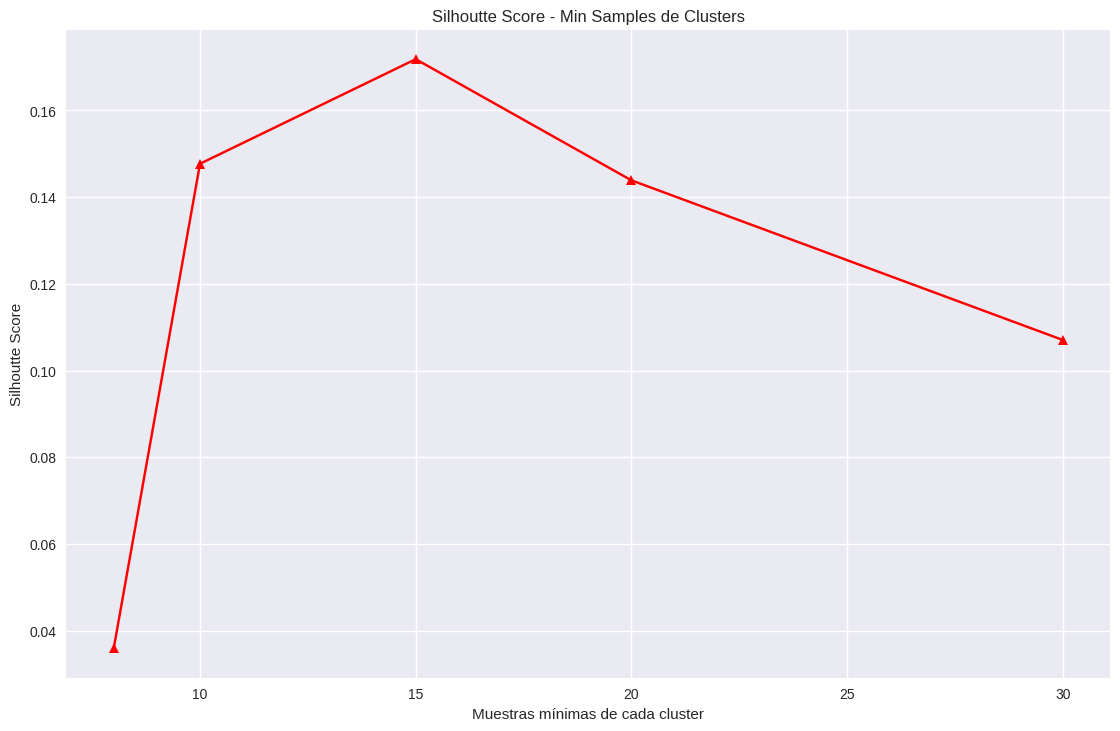

In [ ]:
# --- Selección de hiperparámetros min_sample ---
silhoutte_coefs = []

for min_points in [2, 3, 5, 8, 10]:
    model_d = DBSCAN(eps = epsilon, min_samples = min_points)
    model_d.fit(scaled_features)
    silhoutte_coefs.append(silhouette_score(scaled_features, model_d.labels_))

plt.figure(figsize = (12, 8))
plt.plot([8, 10, 15, 20, 30], silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Muestras mínimas de cada cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Min Samples de Clusters')
plt.show()

El coeficiente de siluetas nos dice que para este modelo se usar 10 clusteres apróximadamente-

In [ ]:
# --- Modelo DBSCAN ---
model_db = DBSCAN(eps = 4, min_samples = 10, n_jobs=-1)
model_db.fit(scaled_features)

DBSCAN(eps=4, min_samples=10, n_jobs=-1)

In [ ]:
# --- Evaluación del modelo DBSCAN ---
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(scaled_features, model_db.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(scaled_features, model_db.labels_))

 ### DBSCAN ###
Silhouette Score:  0.25165786992874073
Calinski harabasz score:  2.5658413560268976


In [ ]:
# Predicción de los clusters
Cluster = model_db.fit_predict(scaled_features)

df_final['Cluster']= Cluster

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,Cluster_1,Cluster_2,cluster_3,Cluster
0,1.518188,-0.576024,0.201610,-1.200477,2.140652,0.813317,-0.676595,1.382237,0.255396,0.364523,1.829017,0.996276,1,1,1,0
1,0.233212,-0.513163,-0.924756,-2.543515,0.067464,0.573970,-0.838491,-0.542671,-0.308763,0.408611,1.099583,0.949008,1,1,1,0
2,0.183310,0.007682,1.133775,-0.284769,0.144249,0.813317,-0.514699,2.373279,0.273306,0.320436,0.776949,1.374422,1,1,1,0


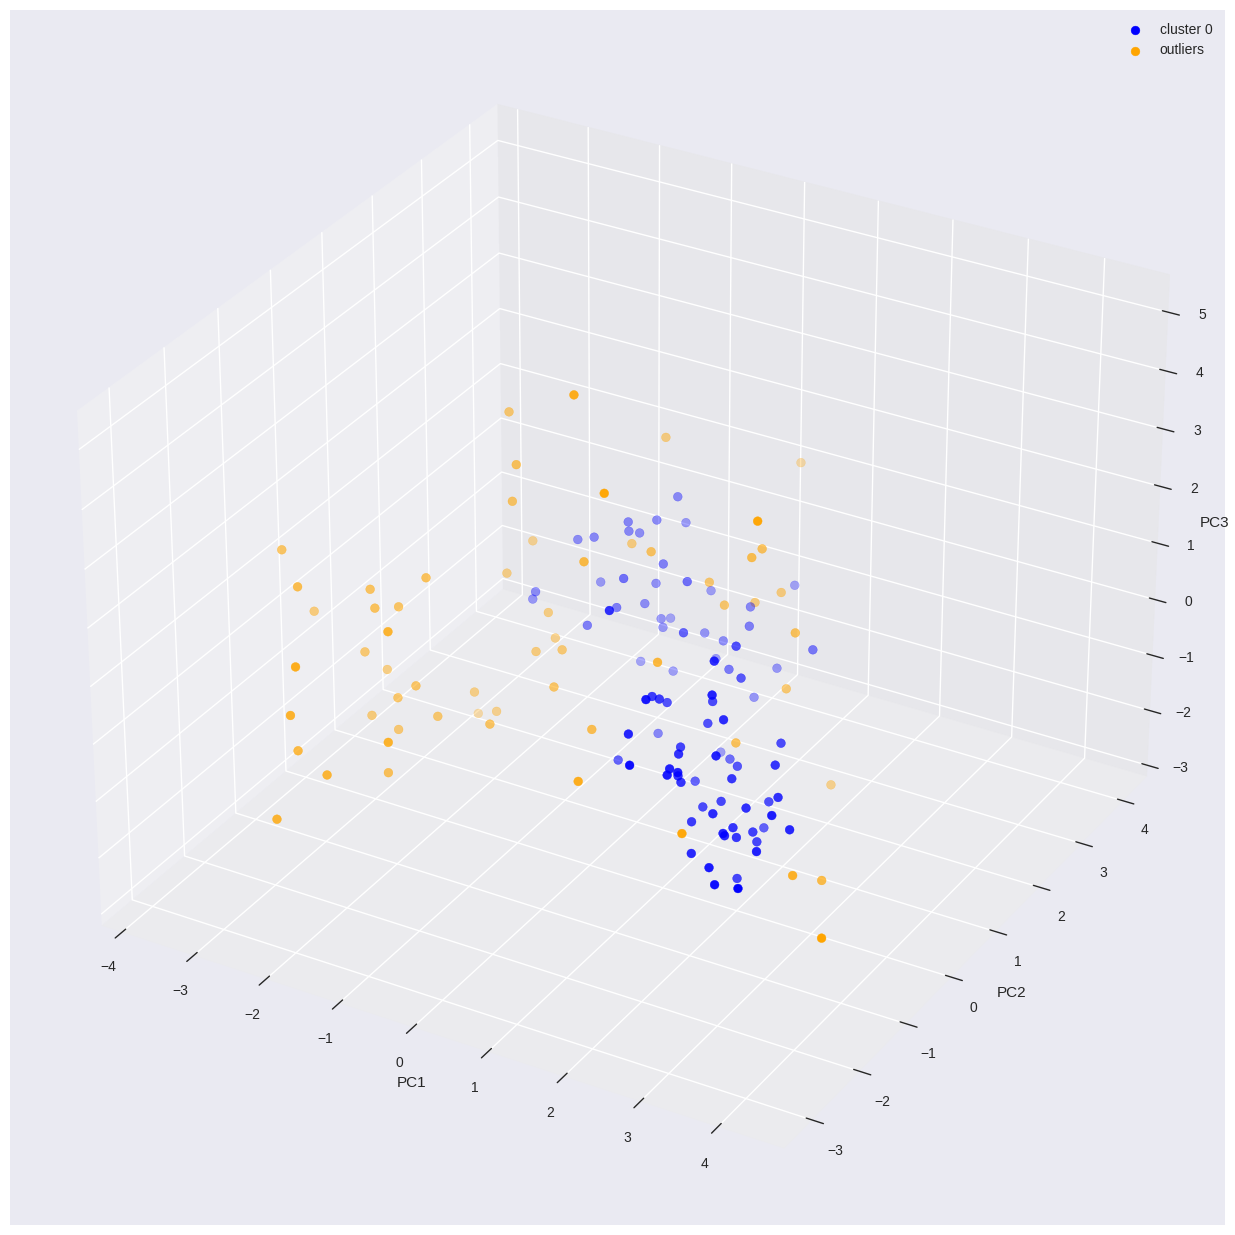

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[Cluster == 0,0],X_pca[Cluster== 0,1],X_pca[Cluster== 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X_pca[Cluster == -1,0],X_pca[Cluster== -1,1],X_pca[Cluster== -1,2], s = 40 , color = 'orange', label = "outliers")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

En la gráfico tridimensional de dispersión para DB-SCAN vemos que hay solapamiento de algunos puntos,  no es posible apreciar tendencias que apunten a alguna dirección en particular, o aglomeración de observaciones. Adicionalmente, se aprecia gran dispersión entre el conjunto de observaciones, y en consecuencia, no es posible detectar observaciones extremas. Los conjuntos están mezclados por lo que este modelo no es tan acertado.

#Interpretación de clusteres

In [ ]:
trat_cols = scaled_features.columns
scaled_features_esc = pd.DataFrame(scaler.inverse_transform(scaled_features), columns=trat_cols)
df_final[trat_cols] = scaled_features_esc
df_final.head(3)

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,Cluster_1,Cluster_2,cluster_3,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,0.28,2.29,5.64,1.04,3.92,1065.0,1,1,1,0
1,13.20,1.78,2.14,11.2,100.0,2.65,0.26,1.28,4.38,1.05,3.40,1050.0,1,1,1,0
2,13.16,2.36,2.67,18.6,101.0,2.80,0.30,2.81,5.68,1.03,3.17,1185.0,1,1,1,0


<Axes: xlabel='Cluster_2', ylabel='count'>

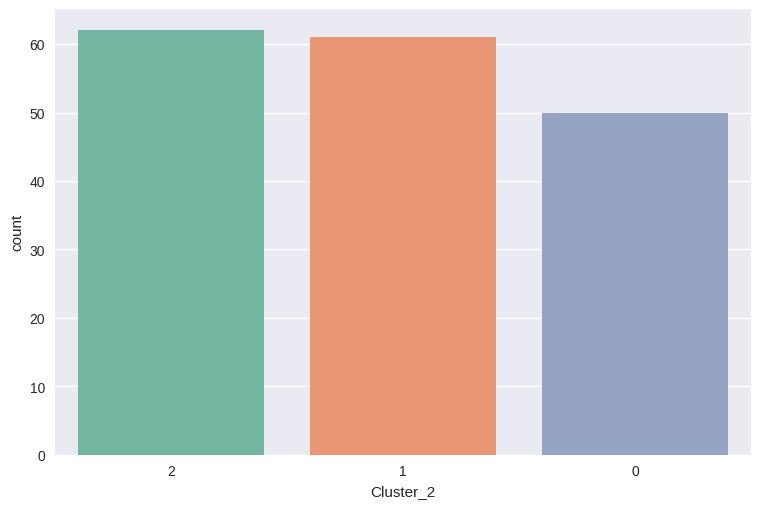

In [ ]:
# Composición de los clusters formados
sns.countplot(x="Cluster_2",data=df_final, palette="Set2", order = df_final['Cluster_2'].value_counts().index)

In [ ]:
pal=['autumn','cool','magma','spring','winter'] # 5 color palettes for 5 categorical vars

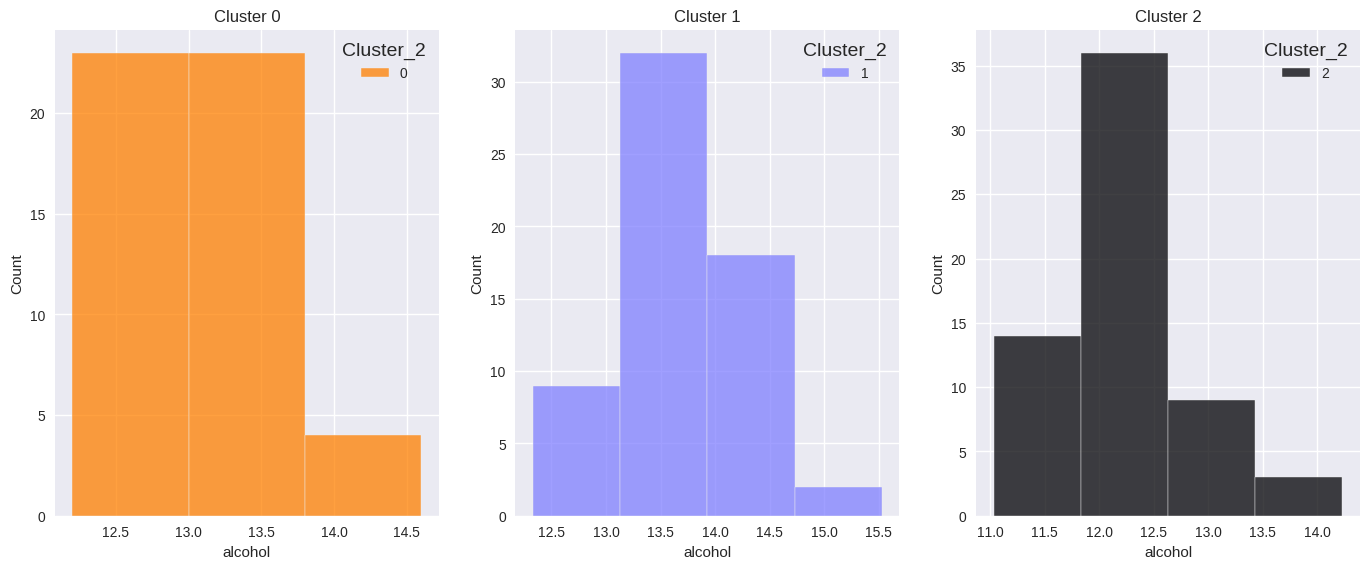

In [ ]:
temp_distancia = df_final[['Cluster_2', 'alcohol']]
fig, axs = plt.subplots(ncols=3, figsize=(15, 6))  # Cambié "ncols" de 4 a 2 para coincidir con el rango de clusters (0,2).

for i in range(3):  # Cambié "list(range(0,2))" a "range(2)".
    plt.sca(axs[i])  # Selecciona el eje actual antes de trazar el gráfico.
    plt.title(f'Cluster {i}')  # Agrega un título con el número de cluster.
    sns.histplot(data=temp_distancia[temp_distancia['Cluster_2'] == i], x='alcohol', hue='Cluster_2', palette=pal[i], binwidth=0.8, multiple='dodge')

plt.show()

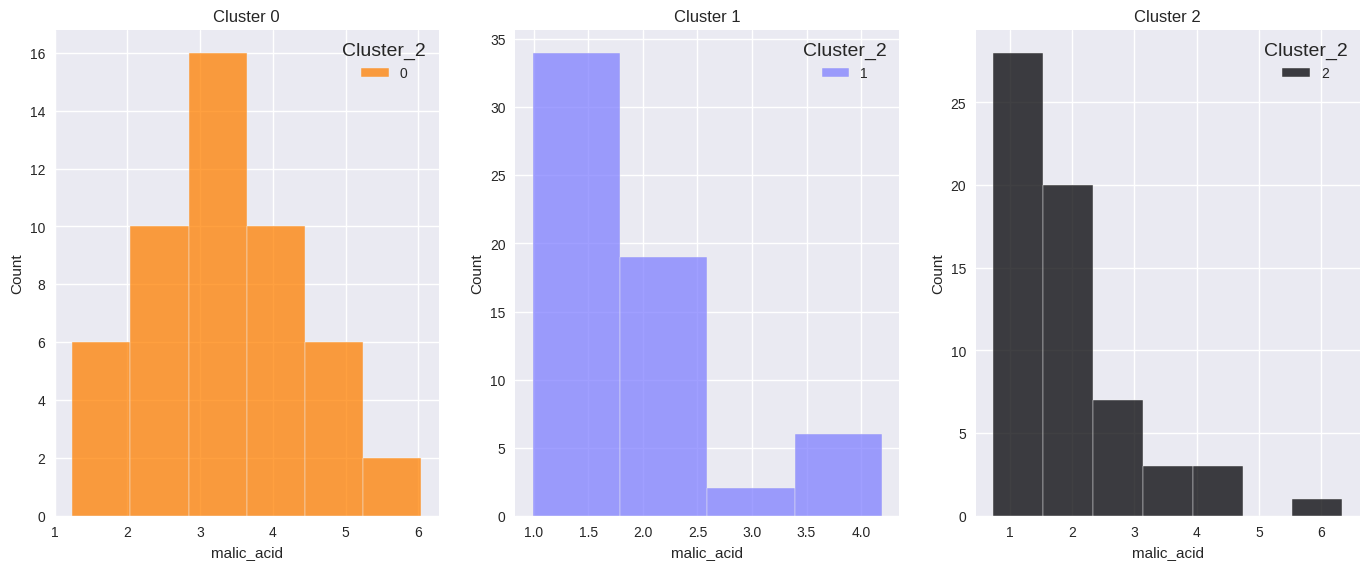

In [ ]:
temp_distancia = df_final[['Cluster_2', 'malic_acid']]
fig, axs = plt.subplots(ncols=3, figsize=(15, 6))  # Cambié "ncols" de 4 a 2 para coincidir con el rango de clusters (0,2).

for i in range(3):  # Cambié "list(range(0,2))" a "range(2)".
    plt.sca(axs[i])  # Selecciona el eje actual antes de trazar el gráfico.
    plt.title(f'Cluster {i}')  # Agrega un título con el número de cluster.
    sns.histplot(data=temp_distancia[temp_distancia['Cluster_2'] == i], x='malic_acid', hue='Cluster_2', palette=pal[i], binwidth=0.8, multiple='dodge')

plt.show()

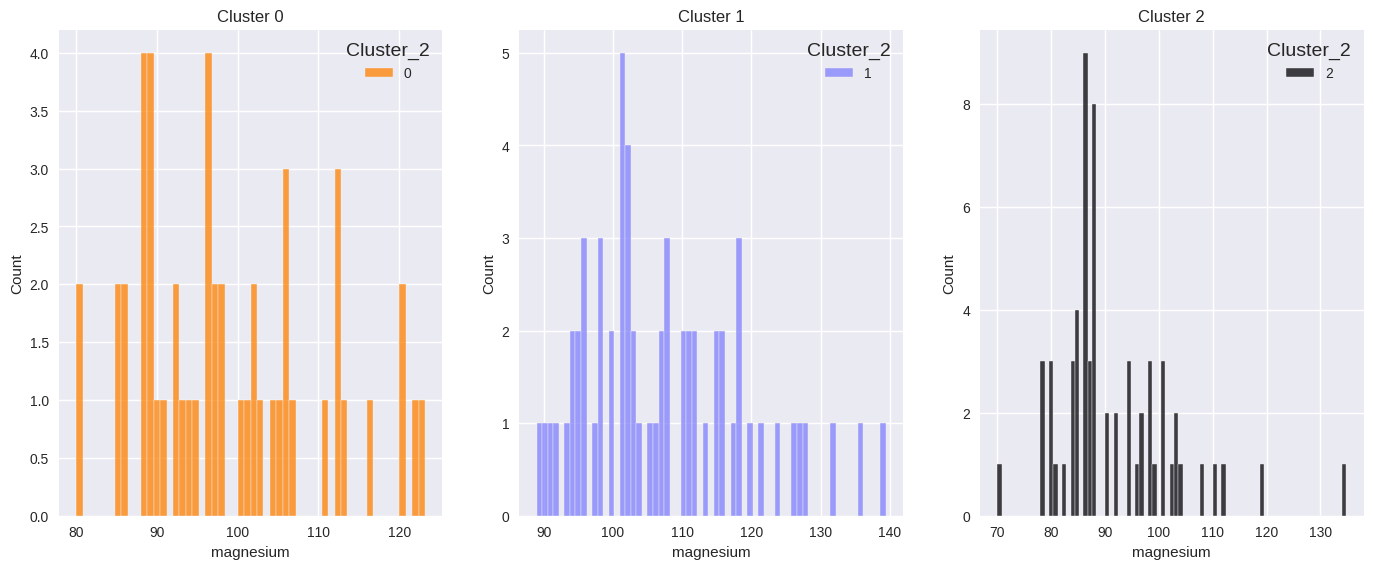

In [ ]:
temp_distancia = df_final[['Cluster_2', 'magnesium']]
fig, axs = plt.subplots(ncols=3, figsize=(15, 6))  # Cambié "ncols" de 4 a 2 para coincidir con el rango de clusters (0,2).

for i in range(3):  # Cambié "list(range(0,2))" a "range(2)".
    plt.sca(axs[i])  # Selecciona el eje actual antes de trazar el gráfico.
    plt.title(f'Cluster {i}')  # Agrega un título con el número de cluster.
    sns.histplot(data=temp_distancia[temp_distancia['Cluster_2'] == i], x='magnesium', hue='Cluster_2', palette=pal[i], binwidth=0.8, multiple='dodge')

plt.show()

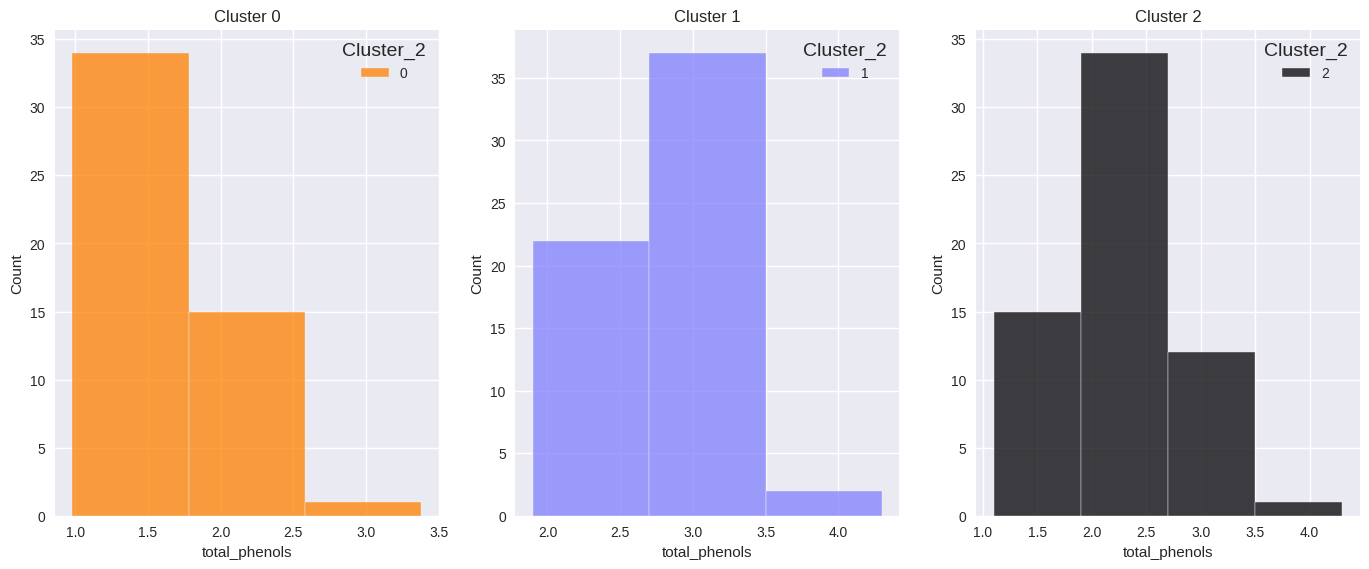

In [ ]:
temp_distancia = df_final[['Cluster_2', 'total_phenols']]
fig, axs = plt.subplots(ncols=3, figsize=(15, 6))  # Cambié "ncols" de 4 a 2 para coincidir con el rango de clusters (0,2).

for i in range(3):  # Cambié "list(range(0,2))" a "range(2)".
    plt.sca(axs[i])  # Selecciona el eje actual antes de trazar el gráfico.
    plt.title(f'Cluster {i}')  # Agrega un título con el número de cluster.
    sns.histplot(data=temp_distancia[temp_distancia['Cluster_2'] == i], x='total_phenols', hue='Cluster_2', palette=pal[i], binwidth=0.8, multiple='dodge')

plt.show()

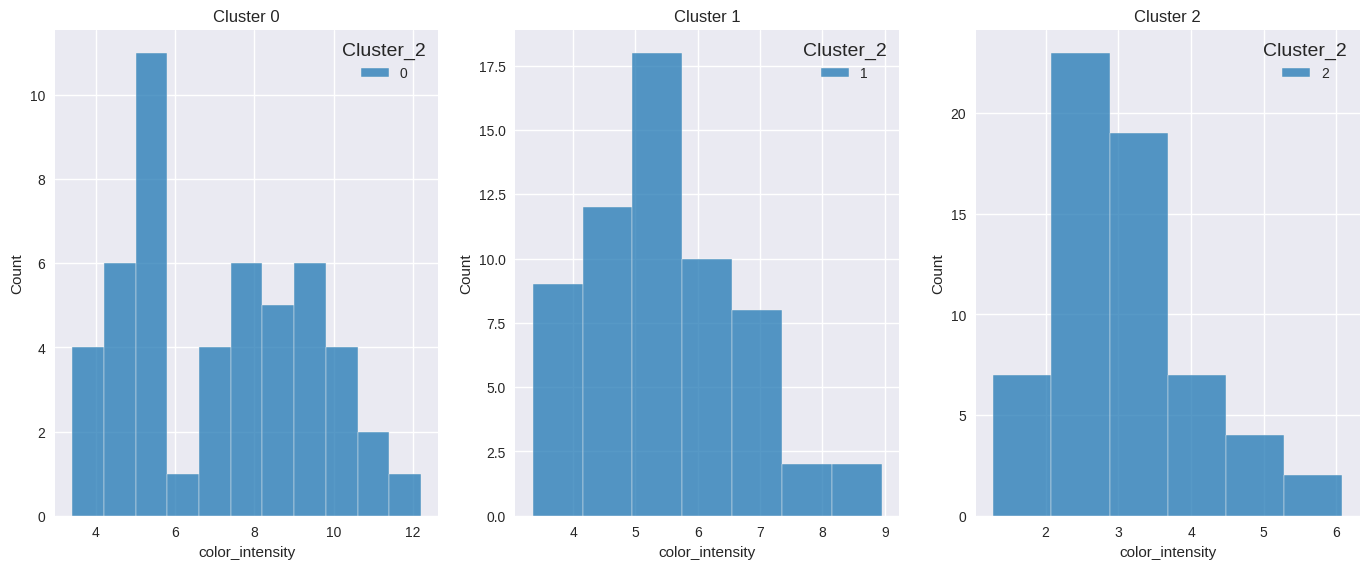

In [ ]:
temp_distancia = df_final[['Cluster_2', 'color_intensity']]
fig, axs = plt.subplots(ncols=3, figsize=(15, 6))  # Cambié "ncols" de 4 a 2 para coincidir con el rango de clusters (0,2).

for i in range(3):  # Cambié "list(range(0,2))" a "range(2)".
    plt.sca(axs[i])  # Selecciona el eje actual antes de trazar el gráfico.
    plt.title(f'Cluster {i}')  # Agrega un título con el número de cluster.
    sns.histplot(data=temp_distancia[temp_distancia['Cluster_2'] == i], x='color_intensity', hue='Cluster_2', palette='tab10', binwidth=0.8, multiple='dodge')

plt.show()

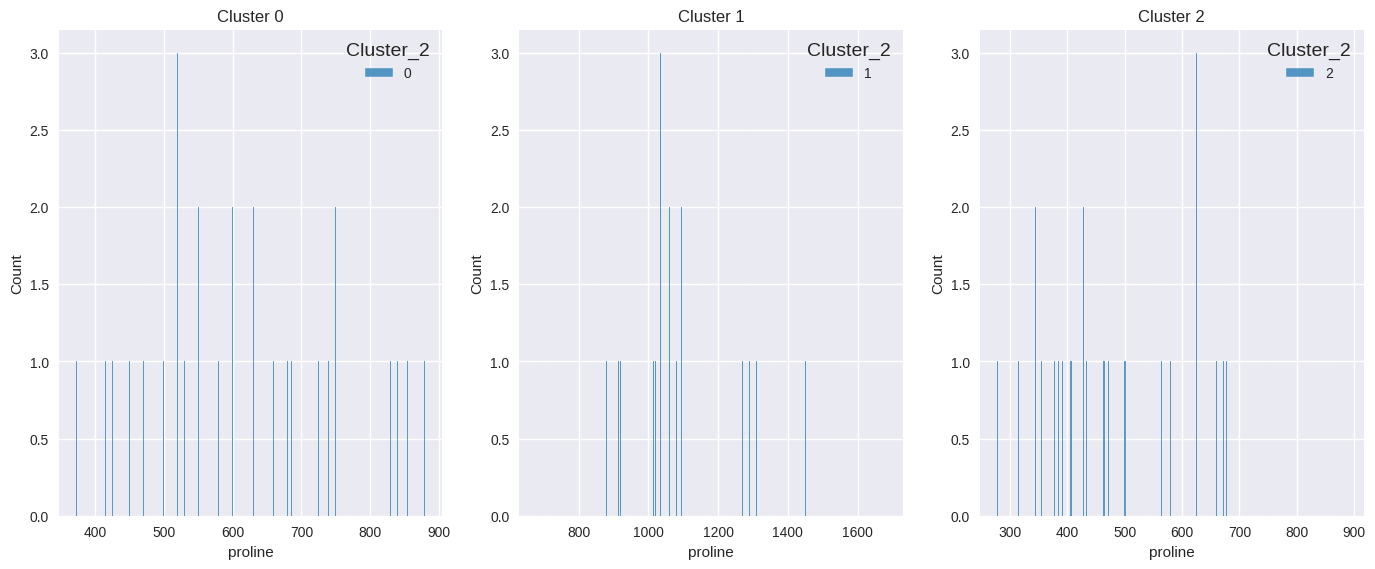

In [ ]:
temp_distancia = df_final[['Cluster_2', 'proline']]
fig, axs = plt.subplots(ncols=3, figsize=(15, 6))  # Cambié "ncols" de 4 a 2 para coincidir con el rango de clusters (0,2).

for i in range(3):  # Cambié "list(range(0,2))" a "range(2)".
    plt.sca(axs[i])  # Selecciona el eje actual antes de trazar el gráfico.
    plt.title(f'Cluster {i}')  # Agrega un título con el número de cluster.
    sns.histplot(data=temp_distancia[temp_distancia['Cluster_2'] == i], x='proline', hue='Cluster_2', palette='tab10', binwidth=0.8, multiple='dodge')

plt.show()

In [ ]:
# Composición de los clusters - Media de las variables por cluster
df_final.groupby(['Cluster_2']).mean()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,Cluster_1,cluster_3,Cluster
Cluster_2,,,,,,,,,,,,,,,
0,13.11000,3.339800,2.412000,21.166000,98.680000,1.661600,0.450400,1.114800,7.119400,0.694400,1.691400,618.240000,0.0,0.000000,-0.040000
1,13.70918,1.988361,2.449672,17.213115,107.360656,2.832295,0.289672,1.914426,5.457705,1.066066,3.149508,1107.573770,1.0,0.983607,-0.163934
2,12.25000,1.911613,2.280323,20.498387,91.370968,2.264032,0.366290,1.583548,3.034677,1.062355,2.837097,501.225806,2.0,0.064516,-0.403226


In [ ]:
pal=['autumn','cool','magma','spring','winter'] # 5 color palettes for 5 categorical vars

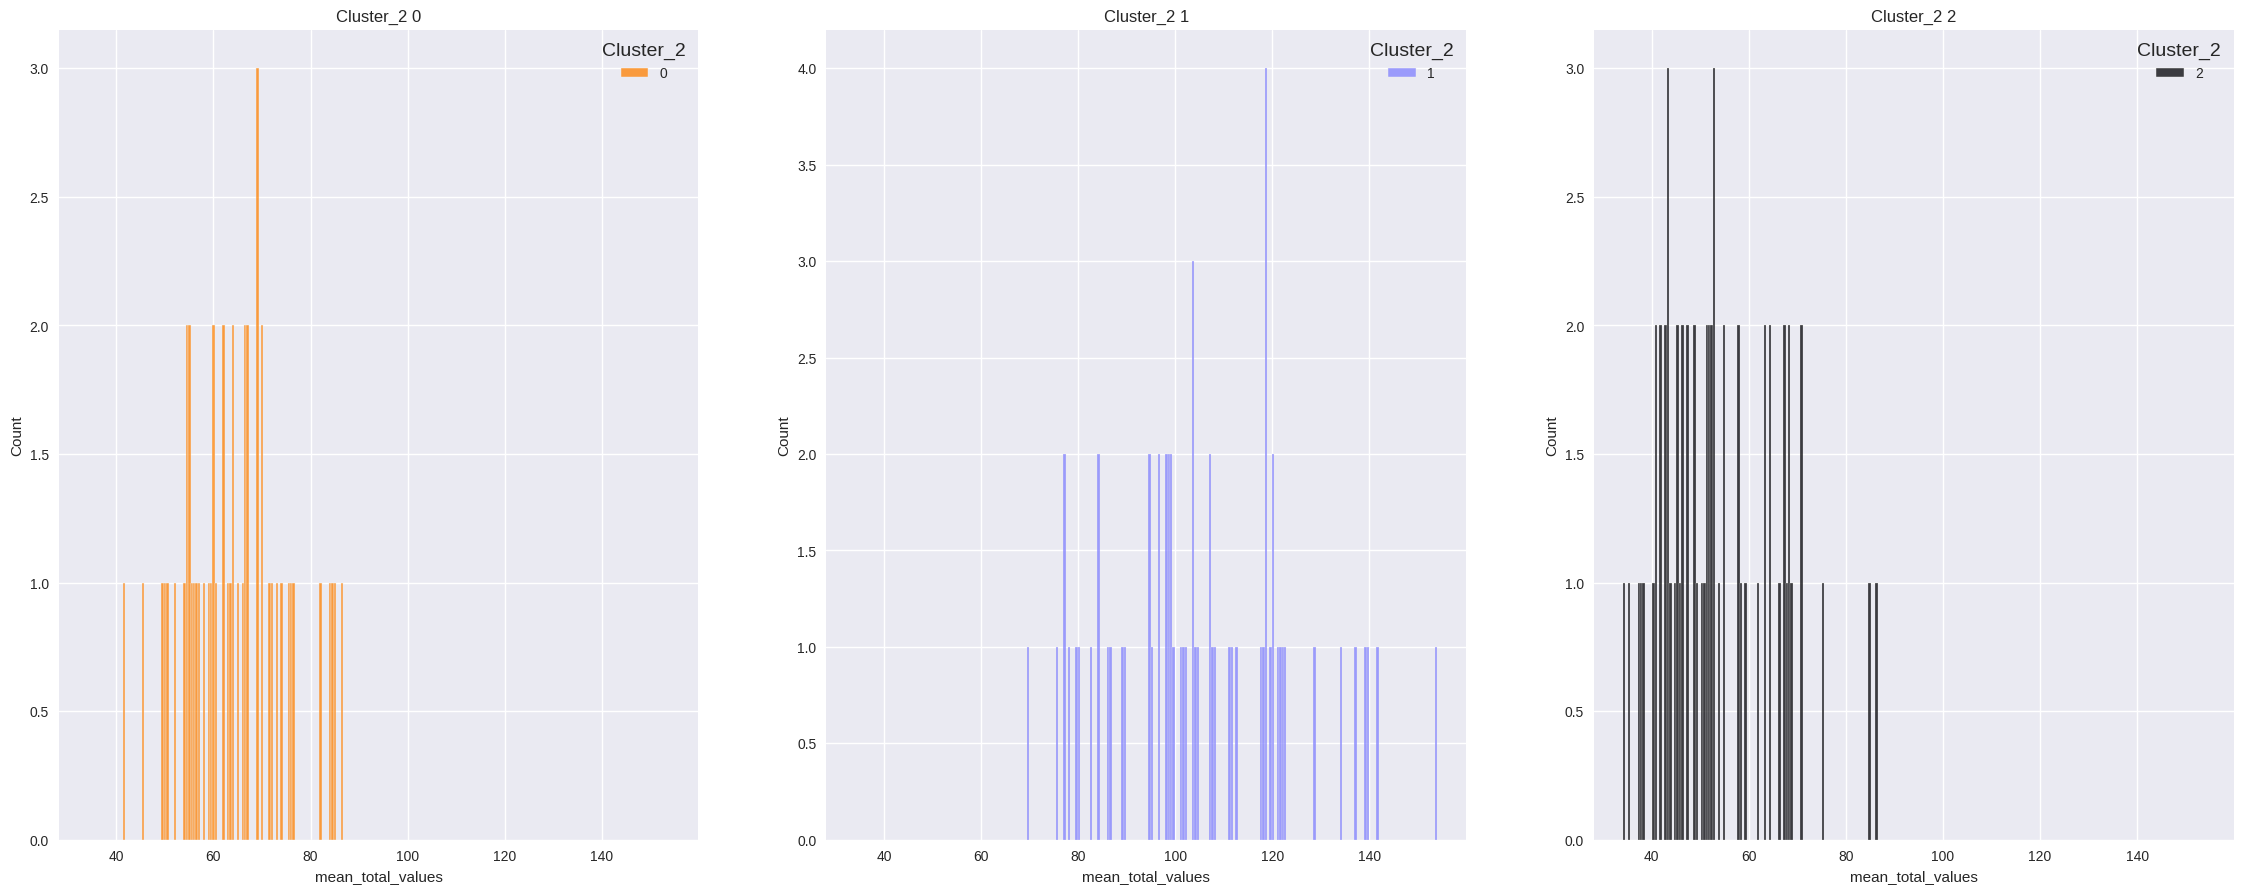

In [ ]:
temp = df_final.columns[:12]
df_final["mean_total_values"] = round(df_final[temp].mean(axis=1), 3)

fig, axs = plt.subplots(ncols=3, figsize=(25, 10), sharex=True)  # Cambiado el número de columnas a 4 para acomodar los 4 clusters

for i in range(3):
    axs[i].set_title(f'Cluster_2 {i}')
    sns.histplot(data=df_final[df_final.Cluster_2 == i], x="mean_total_values", hue="Cluster_2", palette=pal[i], binwidth=0.5, ax=axs[i], multiple='dodge')

plt.show()